# Customer Churn Analysis

## Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

## Prediction:

We will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#import all libaries
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
url="https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv"



In [2]:
#stroing into csv file
df = pd.read_csv(url)
df.to_csv("Customer_Churn_Analysis.csv",sep='\t')

In [3]:
#create dataframe
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [4]:
df.shape

(7043, 21)

Here customerID,  Partner,tenure,MonthlyCharges,TotalCharges are the columns which has categorical ordinal data type.

And PhoneService, MultipleLines, InternetService,OnlineSecurity,OnlineBackup,DeviceProtection, TechSupport,StreamingTV,StreamingMovies, Contract, PaperlessBilling, PaymentMethod,SeniorCitizen, gender, Dependents are the columns which has categorical nominal data type
       
Our Target column is Churn which has categorical nominal data type.Hence our problem is the Classification problem.       
      

In [5]:
df.columns #checking column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()#displays data type information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Exploratory Data Analysis(EDA):

In [7]:
df.isnull().sum() #checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique())) # getting unique values of all the columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df['Churn'] = df['Churn'].replace(('Yes','No'),(0,1))

#change Target column values to 0 and 1

In [10]:
round(df['SeniorCitizen'].value_counts(normalize=True)*100,2)

0    83.79
1    16.21
Name: SeniorCitizen, dtype: float64

No of senior citizens is very low and 16% only in overall

In [11]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

there are 0 tenure present in the column so the total charges could be then equal to one time charges

In [12]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
953.45      1
1859.5      1
6376.55     1
4564.9      1
4921.2      1
Name: TotalCharges, Length: 6531, dtype: int64

there are none values present in totalcharges 

In [13]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'yes', 0: 'no'}).astype('category')

convert seniorcitizen values to 0 and 1

In [14]:
df['tenuremonth'] = (df['tenure'] * df['MonthlyCharges']).astype(float)

it is the total amount paid in overall tenure

In [15]:
# 6 features, convert 'no internet service' to 'no'
no_int_service_vars = ['OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection','TechSupport', 
                       'StreamingTV', 'StreamingMovies']
for var in no_int_service_vars:
    df[var] = df[var].map({'No internet service': 'No',
                           'Yes': 'Yes',
                           'No': 'No'}).astype('category')
for var in no_int_service_vars:
    print(df[var].value_counts())

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64
No     4614
Yes    2429
Name: OnlineBackup, dtype: int64
No     4621
Yes    2422
Name: DeviceProtection, dtype: int64
No     4999
Yes    2044
Name: TechSupport, dtype: int64
No     4336
Yes    2707
Name: StreamingTV, dtype: int64
No     4311
Yes    2732
Name: StreamingMovies, dtype: int64


replace no internet service value to no in the columns

In [16]:
view=df[df['Churn']==1]
view.loc[:,['customerID','gender','tenure','Contract','PaymentMethod','TotalCharges']]

customerID  gender  tenure        Contract              PaymentMethod  \
0     7590-VHVEG  Female       1  Month-to-month           Electronic check   
1     5575-GNVDE    Male      34        One year               Mailed check   
3     7795-CFOCW    Male      45        One year  Bank transfer (automatic)   
6     1452-KIOVK    Male      22  Month-to-month    Credit card (automatic)   
7     6713-OKOMC  Female      10  Month-to-month               Mailed check   
...          ...     ...     ...             ...                        ...   
7037  2569-WGERO  Female      72        Two year  Bank transfer (automatic)   
7038  6840-RESVB    Male      24        One year               Mailed check   
7039  2234-XADUH  Female      72        One year    Credit card (automatic)   
7040  4801-JZAZL  Female      11  Month-to-month           Electronic check   
7042  3186-AJIEK    Male      66        Two year  Bank transfer (automatic)   

     TotalCharges  
0           29.85  
1          1889.5  
3         1840.75  
6          1949.4  
7           301.9  
...           ...  
7037       1419.4  
7038       1990.5  
7039       7362.9  
7040       346.45  
7042       6844.5  

[5174 rows x 6 columns]

displays churn customer details

In [17]:
first_view=df[df['tenure']==0]
first_view.loc[:,['customerID','gender','tenure','MonthlyCharges','TotalCharges']]

customerID  gender  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI  Female       0           52.55             
753   3115-CZMZD    Male       0           20.25             
936   5709-LVOEQ  Female       0           80.85             
1082  4367-NUYAO    Male       0           25.75             
1340  1371-DWPAZ  Female       0           56.05             
3331  7644-OMVMY    Male       0           19.85             
3826  3213-VVOLG    Male       0           25.35             
4380  2520-SGTTA  Female       0           20.00             
5218  2923-ARZLG    Male       0           19.70             
6670  4075-WKNIU  Female       0           73.35             
6754  2775-SEFEE    Male       0           61.90

displays details of tenure month '0'

In [18]:
#Convert TotalCharges Column to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [19]:
# fill missing values by the monthly charges where the tenure is 0, we suppose that the monthly charge is the total amount of charges.
df['TotalCharges'].fillna(df[df['tenure']==0]['MonthlyCharges'], inplace=True)

In [20]:
#visualize
view1=df[df['tenure']==0]
view1.loc[:,['customerID','gender','tenure','MonthlyCharges','TotalCharges']]

customerID  gender  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI  Female       0           52.55         52.55
753   3115-CZMZD    Male       0           20.25         20.25
936   5709-LVOEQ  Female       0           80.85         80.85
1082  4367-NUYAO    Male       0           25.75         25.75
1340  1371-DWPAZ  Female       0           56.05         56.05
3331  7644-OMVMY    Male       0           19.85         19.85
3826  3213-VVOLG    Male       0           25.35         25.35
4380  2520-SGTTA  Female       0           20.00         20.00
5218  2923-ARZLG    Male       0           19.70         19.70
6670  4075-WKNIU  Female       0           73.35         73.35
6754  2775-SEFEE    Male       0           61.90         61.90

When tenure is 0 then monthly charges paid  will be equal to the Total charges paid

In [21]:
monthly_income  = df['MonthlyCharges'].sum()
churn_customer_amount = df.groupby(by=['Churn']).MonthlyCharges.sum().to_frame()
churn_customer_amount["%"] = 0
churn_customer_amount["%"]= churn_customer_amount["MonthlyCharges"].apply(lambda x: round(x/churn_customer_amount['MonthlyCharges'].sum(), 3))
churn_customer_amount.columns=['Total', '%']
print('The amount of MothlyChages : ',monthly_income)
display(churn_customer_amount)


The amount of MothlyChages :  456116.6


Total      %
Churn                  
0      139130.85  0.305
1      316985.75  0.695

displays churn category wise monthlycharges and percentages

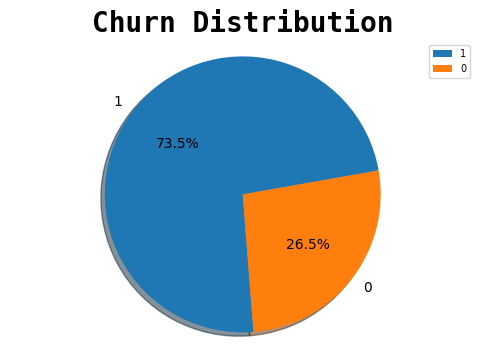

In [22]:
# Creating a pie chart 
ax = df['Churn'].value_counts()

plt.style.use('default')
plt.figure(figsize=(6, 4))
plt.pie(ax.values, labels=ax.index, startangle=10, explode=(None), shadow=True, autopct='%1.1f%%')
plt.title('Churn Distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

churn customer percentage is higher than not churn

In [23]:
#function to create pivote table 
def table(data,column,index,value,aggf):
    count = data[data[column]==1].pivot_table(index=index,columns=column,values=value, aggfunc=aggf)
    prct  = round(count/data[data[column]==1].shape[0],3)
    data  = pd.concat([count,prct],axis=1)
    data.columns = ['Total','%']
    return data 

In [24]:
table(data=df,column='Churn',index='gender',value='customerID', aggf='count')

Total      %
gender              
Female   2549  0.493
Male     2625  0.507

displays gender category wise total count values and percentages

In [25]:
table(data=df,column='Churn',index='SeniorCitizen',value='customerID', aggf='count')

Total      %
SeniorCitizen              
no              4508  0.871
yes              666  0.129

displays SeniorCitizen category wise total count values and percentages

In [26]:
table(data=df,column='Churn',index='Partner',value='customerID', aggf='count')


Total      %
Partner              
No        2441  0.472
Yes       2733  0.528

displays Partner category wise total count values and percentages

In [27]:
table(data=df,column='Churn',index='Dependents',value='customerID', aggf='count')

Total      %
Dependents              
No           3390  0.655
Yes          1784  0.345

displays Dependents category wise total count values and percentages

In [28]:
table(data=df,column='Churn',index='PhoneService',value='customerID', aggf='count')

Total      %
PhoneService              
No              512  0.099
Yes            4662  0.901

displays PhoneService category wise total count values and percentages

# DISPLAYS FEATURE WISE TOTAL COUNT OF CHURN AND PERCENTAGE VALUES

In [29]:
table(data=df,column='Churn',index='MultipleLines',value='customerID', aggf='count')

Total      %
MultipleLines                 
No                 2541  0.491
No phone service    512  0.099
Yes                2121  0.410

In [30]:
table(data=df,column='Churn',index='OnlineSecurity',value='customerID', aggf='count')

Total      %
OnlineSecurity              
No               3450  0.667
Yes              1724  0.333

In [31]:
table(data=df,column='Churn',index='OnlineBackup',value='customerID', aggf='count')

Total      %
OnlineBackup              
No             3268  0.632
Yes            1906  0.368

In [32]:
table(data=df,column='Churn',index='DeviceProtection',value='customerID', aggf='count')

Total      %
DeviceProtection              
No                 3297  0.637
Yes                1877  0.363

In [33]:
table(data=df,column='Churn',index='TechSupport',value='customerID', aggf='count')

Total      %
TechSupport              
No            3440  0.665
Yes           1734  0.335

In [34]:
table(data=df,column='Churn',index='StreamingTV',value='customerID', aggf='count')

Total      %
StreamingTV              
No            3281  0.634
Yes           1893  0.366

In [35]:
table(data=df,column='Churn',index='StreamingMovies',value='customerID', aggf='count')

Total     %
StreamingMovies             
No                3260  0.63
Yes               1914  0.37

In [36]:
table(data=df,column='Churn',index='PaperlessBilling',value='customerID', aggf='count')

Total      %
PaperlessBilling              
No                 2403  0.464
Yes                2771  0.536

In [37]:
table(data=df,column='Churn',index='PaymentMethod',value='customerID', aggf='count')

Total      %
PaymentMethod                          
Bank transfer (automatic)   1286  0.249
Credit card (automatic)     1290  0.249
Electronic check            1294  0.250
Mailed check                1304  0.252

In [38]:
table(data=df,column='Churn',index='Contract',value='customerID', aggf='count')

Total      %
Contract                    
Month-to-month   2220  0.429
One year         1307  0.253
Two year         1647  0.318

In [39]:
df.corr()['Churn'].sort_values(ascending = False)#Get Correlation of "Churn"

Churn             1.000000
tenure            0.352229
tenuremonth       0.198514
TotalCharges      0.198347
MonthlyCharges   -0.193356
Name: Churn, dtype: float64

Displays correlation of churn column with other numeric column.Here tenure feature has the high correlation with churn

In [40]:
df['Churn'] = df['Churn'].replace((0,1),('Yes','No'))#replace churn values to 0 and 1

In [41]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_phoneservice=df[df['Churn']=='Yes'].pivot_table(index='MultipleLines',columns='Churn', values='customerID', aggfunc='count')
churn_phoneservice["%"] = churn_phoneservice["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_phoneservice

Churn             Yes         %
MultipleLines                  
No                849  0.454254
No phone service  170  0.090958
Yes               850  0.454789

shows whether multiplelines of  churn customer's counts and percentages

In [42]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_demographic=df[df['Churn']=='Yes'].pivot_table(columns='Churn',index= 'SeniorCitizen', values='customerID', aggfunc='count')
churn_demographic["%"] = churn_demographic["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_demographic

Churn           Yes         %
SeniorCitizen                
no             1393  0.745318
yes             476  0.254682

shows whether SeniorCitizen of churn customer's counts and percentages values

In [43]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_internetservices=df[df['Churn']=='Yes'].pivot_table(index=['InternetService','OnlineSecurity','OnlineBackup'],columns='Churn', values='customerID', aggfunc='count')
churn_internetservices["%"] = churn_internetservices["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_internetservices


Churn                                        Yes         %
InternetService OnlineSecurity OnlineBackup               
DSL             No             No            274  0.146602
                               Yes            73  0.039058
                Yes            No             69  0.036918
                               Yes            43  0.023007
Fiber optic     No             No            783  0.418941
                               Yes           331  0.177100
                Yes            No            107  0.057250
                               Yes            76  0.040663
No              No             No            113  0.060460
                               Yes             0  0.000000
                Yes            No              0  0.000000
                               Yes             0  0.000000

shows whether InternetService of churn customer's counts and percentages values

In [44]:
churn_inter_deviceprotec=df[df['Churn']=='Yes'].pivot_table(index=['TechSupport','DeviceProtection'],columns='Churn', values='customerID', aggfunc='count')
churn_inter_deviceprotec["%"] = churn_inter_deviceprotec["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_inter_deviceprotec

Churn                          Yes         %
TechSupport DeviceProtection                
No          No                1161  0.621188
            Yes                398  0.212948
Yes         No                 163  0.087212
            Yes                147  0.078652

shows whether TechSupport of churn customer's counts and percentages values

In [45]:
churn_streaming=df[df['Churn']=='Yes'].pivot_table(index=['StreamingTV','StreamingMovies'],columns='Churn', values='customerID', aggfunc='count')
churn_streaming["%"] = churn_streaming["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_streaming

Churn                        Yes         %
StreamingTV StreamingMovies               
No          No               808  0.432317
            Yes              247  0.132156
Yes         No               243  0.130016
            Yes              571  0.305511

shows whether StreamingTV of churn customer's counts and percentages values

In [46]:
#Creation of a table to visualize at which level these variables affect the level of the churned customer.
churn_billinginfo = df[df['Churn']=='Yes'].pivot_table(columns='Churn',index='PaperlessBilling', values='customerID', aggfunc='count')
churn_billinginfo["%"] = churn_billinginfo["Yes"].apply(lambda x: x/df[df['Churn']=='Yes'].shape[0])
churn_billinginfo

Churn              Yes         %
PaperlessBilling                
No                 469  0.250936
Yes               1400  0.749064

shows whether PaperlessBilling of churn customer's counts and percentages values

In [47]:
churn_customer_totamount = df.groupby(by=['Churn']).TotalCharges.sum().to_frame()
churn_customer_totamount

TotalCharges
Churn              
No       13193697.4
Yes       2862926.9

displays churn category wise customer details of totalcharges

In [48]:
churn_customer_amount = df.groupby(by=['Churn']).MonthlyCharges.sum().to_frame()
churn_customer_amount

MonthlyCharges
Churn                
No          316985.75
Yes         139130.85

displays churn category wise customer details of MonthlyCharges

In [49]:
df[["gender", "Churn"]].groupby(by="Churn").count()

gender
Churn        
No       5174
Yes      1869

displays churn category wise customer's gender details of count values

In [50]:
# Examine the distribution of TotalCharges
df.TotalCharges.describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

(array([2720., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

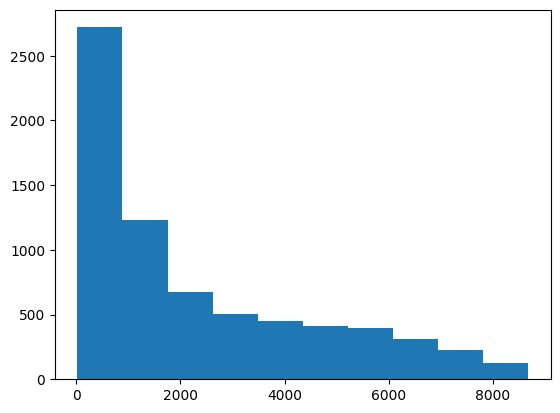

In [51]:
# Examine the distribution of TotalCharges
plt.hist(data = df, x = 'TotalCharges')

I found that around 20% of the data are extremely high, so I decided to divide them to see each distribution of data.

In [52]:
#find the 80th percentile of the data in total charges
df.TotalCharges.quantile(0.8)

4471.440000000001

In [53]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
TotalCharges_under80 = df.query('TotalCharges<=2827.59')
TotalCharges_above80 = df.query('TotalCharges>2827.59')
TotalCharges_under80.TotalCharges.describe()

count    4741.000000
mean      888.238294
std       773.809212
min        18.800000
25%       198.250000
50%       684.050000
75%      1414.800000
max      2823.000000
Name: TotalCharges, dtype: float64

In [54]:
#show the distribution of its TotalCharges above 80th percentile
TotalCharges_above80.TotalCharges.describe()

count    2302.000000
mean     5145.736990
std      1511.316386
min      2830.450000
25%      3858.900000
50%      4966.550000
75%      6302.837500
max      8684.800000
Name: TotalCharges, dtype: float64

In [55]:
#show the distribution of its tenure under 80th percentile
TotalCharges_under80.tenure.describe()

count    4741.000000
mean       20.211348
std        19.218125
min         0.000000
25%         4.000000
50%        14.000000
75%        30.000000
max        72.000000
Name: tenure, dtype: float64

In [56]:
#show the distribution of its tenure above 80th percentile
TotalCharges_above80.tenure.describe()

count    2302.000000
mean       57.414422
std        12.370365
min        27.000000
25%        48.000000
50%        60.000000
75%        69.000000
max        72.000000
Name: tenure, dtype: float64

In [57]:
# Extract those who are paying the service
paying_df = df.query('Churn=="No"')

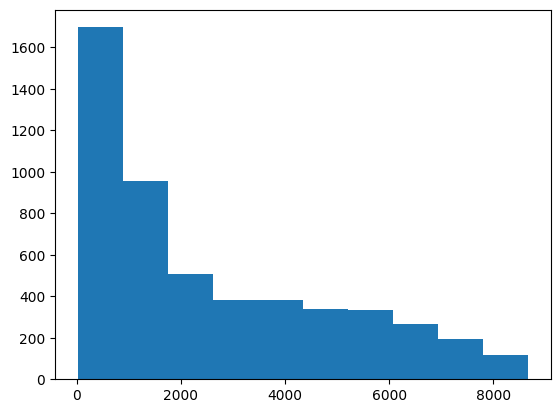

In [58]:
# Visualize
plt.hist(data = paying_df, x = 'TotalCharges');

Note: In order to equally invesetigate data, I decided to divide the data into 80/20% as last two questions

In [59]:
#find the 80th percentile of the data in total charges
paying_df.TotalCharges.quantile(0.8)

4890.900000000001

In [60]:
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
paying_TotalCharges_under80 = paying_df.query('TotalCharges<=4890')
paying_TotalCharges_above80 = paying_df.query('TotalCharges>4890')
paying_TotalCharges_under80.TotalCharges.mean(),paying_TotalCharges_above80.TotalCharges.mean()

(1588.4743233446102, 6390.531515444026)

In [61]:
paying_TotalCharges_under80.tenure.mean(),paying_TotalCharges_above80.tenure.mean()

(30.619139681005315, 65.33301158301158)

# VISUALIZATION

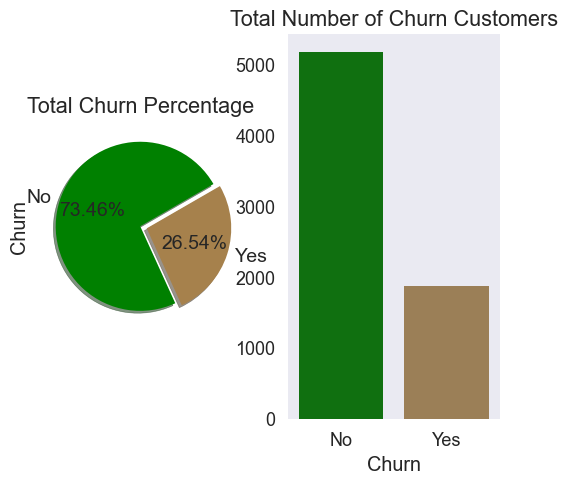

In [62]:
plt.style.use(['seaborn-dark','seaborn-talk'])
fig, ax = plt.subplots(1,2,figsize=(6,5))
df['Churn'].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30, colors=["#008000", "#a6814c"])
ax[0].set_title('Total Churn Percentage')

sns.countplot('Churn', data=df, ax=ax[1], palette=["#008000", "#a6814c"])
ax[1].set_title('Total Number of Churn Customers')
ax[1].set_ylabel(' ')

plt.show()

This shows this is imbalanced dataset.churn customer is higher in count than not churn customer

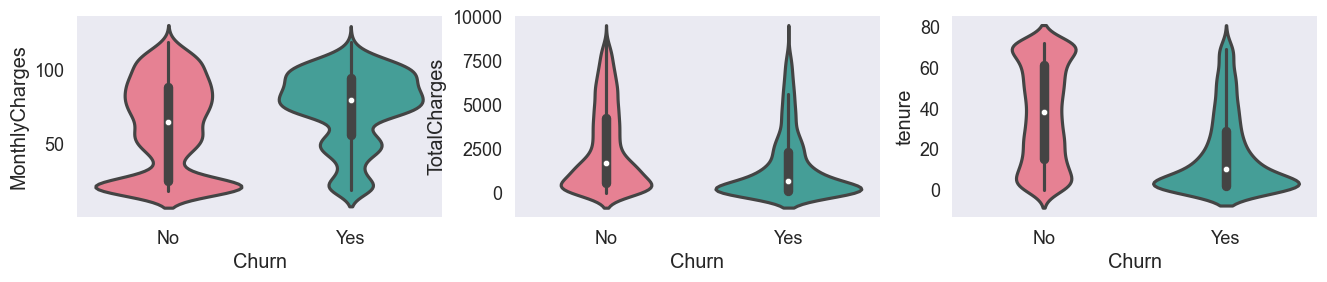

In [63]:
plt.figure(figsize=(16, 12))

for e, column in enumerate(['MonthlyCharges','TotalCharges','tenure']):
    plt.subplot(4, 3, e + 1)
    sns.violinplot( data=df, x='Churn', y=column, palette="husl")

displays median values for charges customer pays and  their tenure details

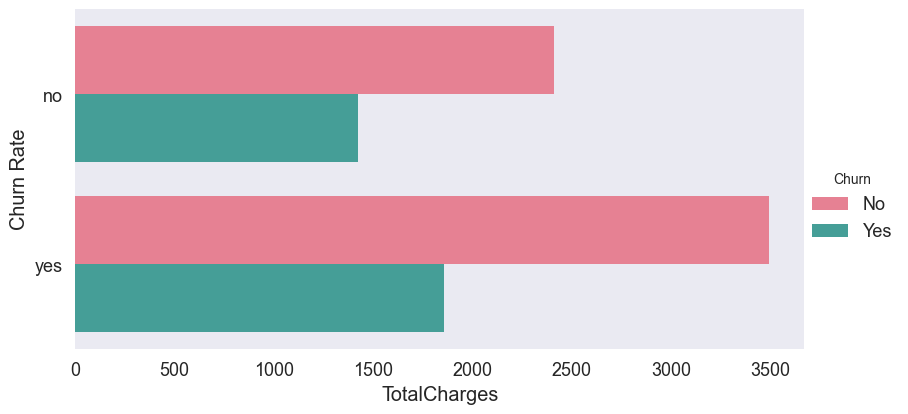

In [64]:
g = sns.factorplot( x="TotalCharges", y="SeniorCitizen", hue='Churn', data=df, size=4, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

churn customer pays higher than not churn

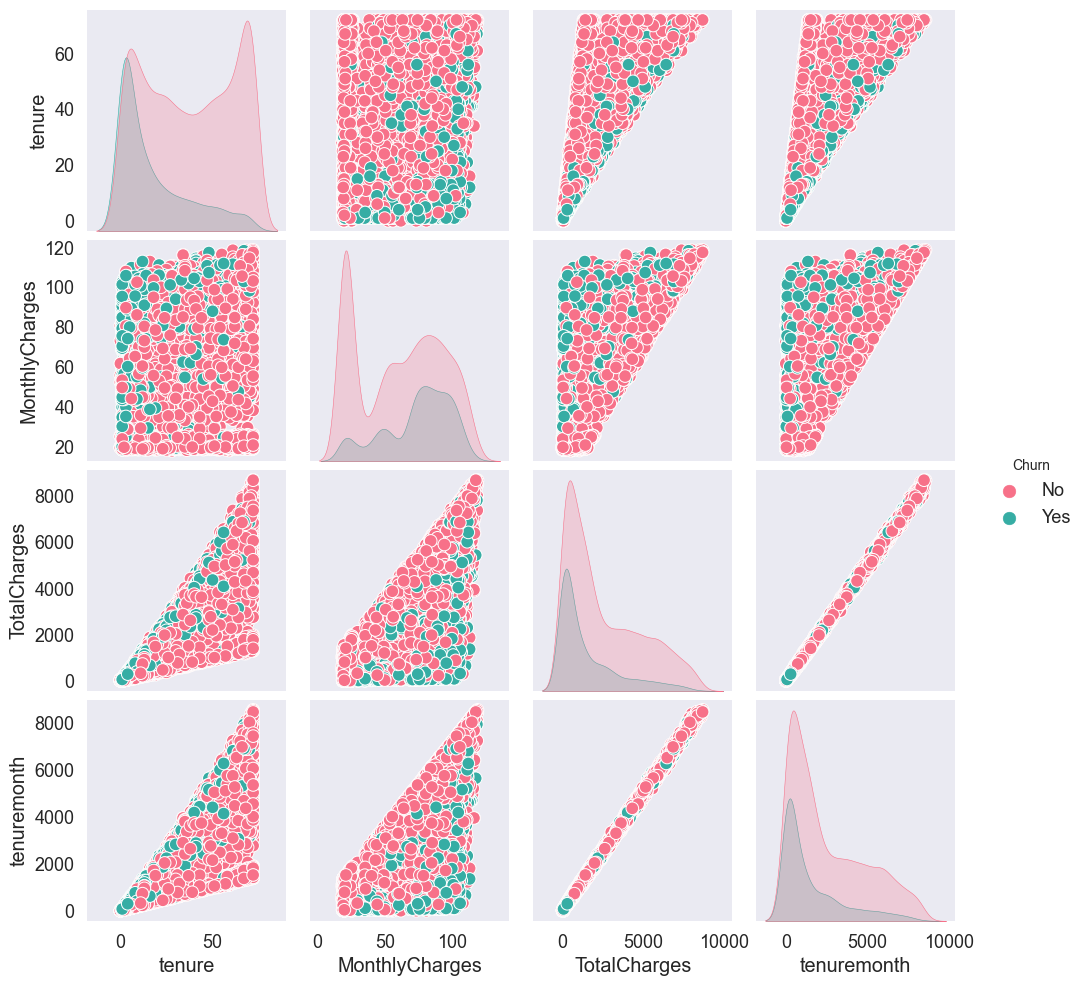

In [65]:
sns.pairplot(df, hue="Churn", palette='husl')
sns.despine()

if monthly charge increases total charges increases and if tenure increases total charges also increases

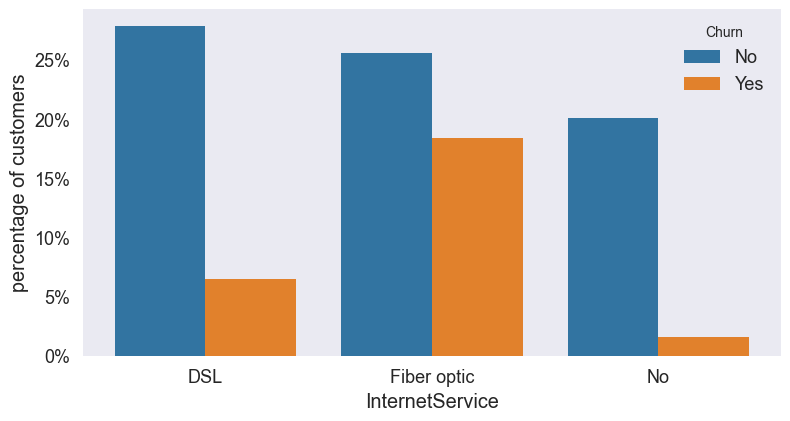

In [66]:
def barplot_percentages(f, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(f)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=f, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=f, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()

plt.figure(figsize=(9, 4.5))
barplot_percentages('InternetService')

not churn customers uses DSL service most

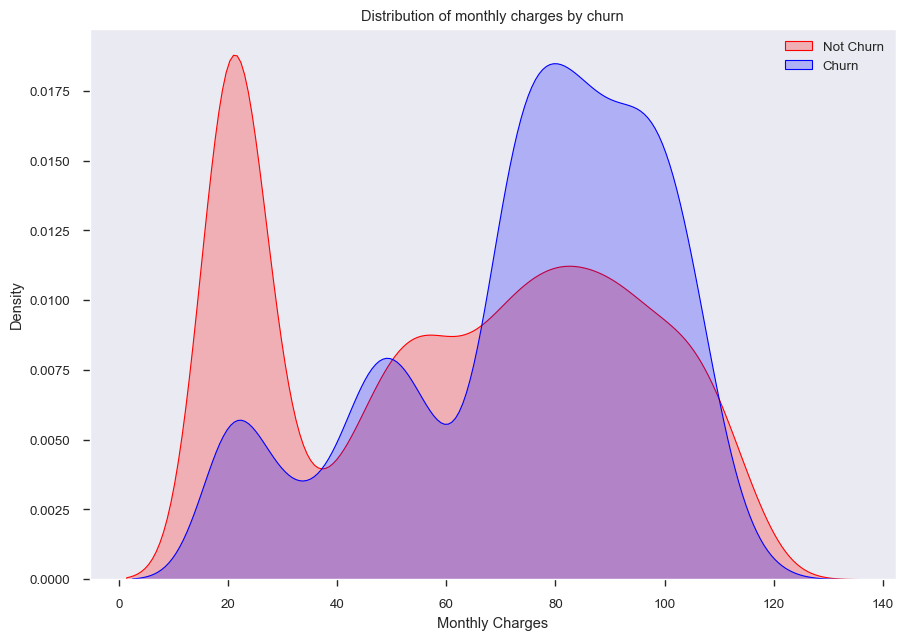

In [67]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

churn customer paying higher charges than not churn

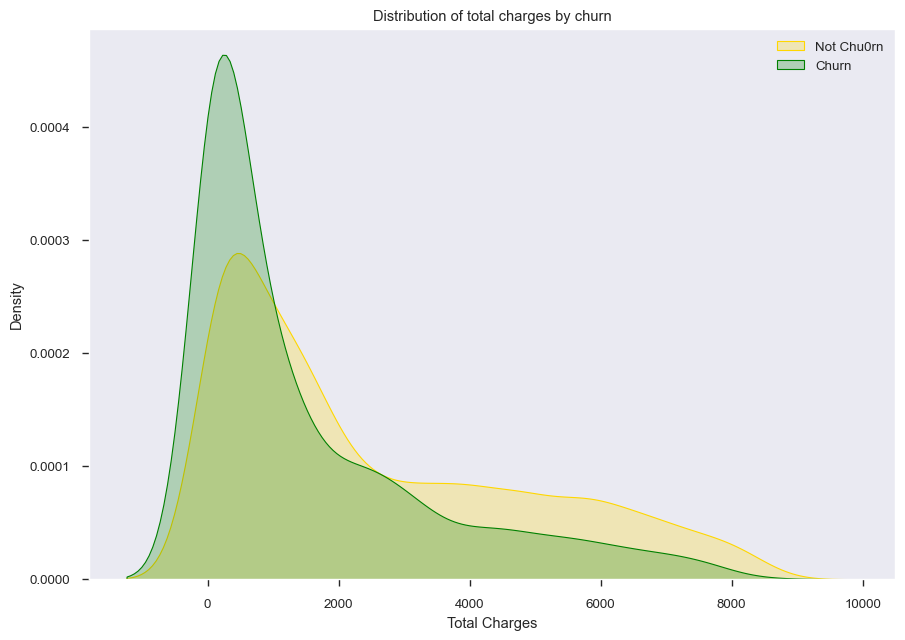

In [68]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

churn customer paying higher total charges than not churn

In [69]:
import plotly.express as px

In [70]:
def display_bars_splitted(a,b="Churn"):
    df_g = df.groupby([a, b]).size().reset_index()
    df_g['percentage'] = df.groupby([a, b]).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
    df_g.columns = [a, b, 'Counts', 'Percentage']

    fig = px.bar(df_g, x=a, y=['Counts'], color=b, title = a, text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))
    fig.show()

In [71]:
display_bars_splitted("gender")

In [72]:
display_bars_splitted("Partner")

In [73]:
display_bars_splitted("Dependents")

In [74]:
display_bars_splitted("MultipleLines")

In [75]:
display_bars_splitted("InternetService")

In [76]:
display_bars_splitted("OnlineSecurity")

In [77]:
display_bars_splitted("OnlineBackup")

In [78]:
display_bars_splitted("DeviceProtection")

In [79]:
display_bars_splitted("TechSupport")

In [80]:
display_bars_splitted("StreamingTV")

In [81]:
display_bars_splitted("Contract")

In [82]:
display_bars_splitted("PaperlessBilling")

In [83]:
display_bars_splitted("PaymentMethod")

the above graphs shows churn customer is only in higher ratio than not churn customer in all categories of features

In [84]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')

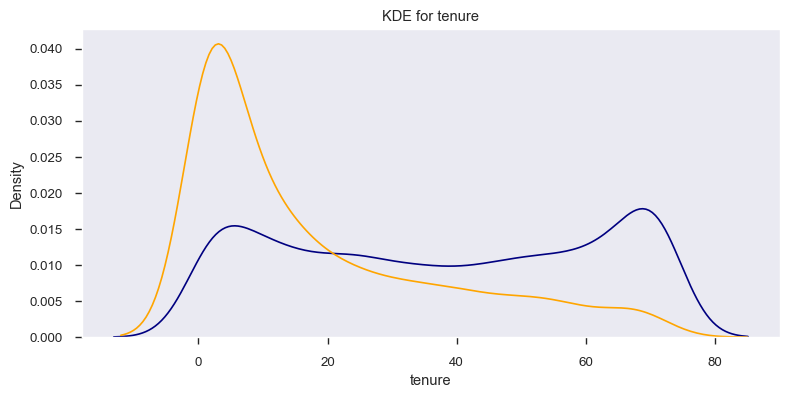

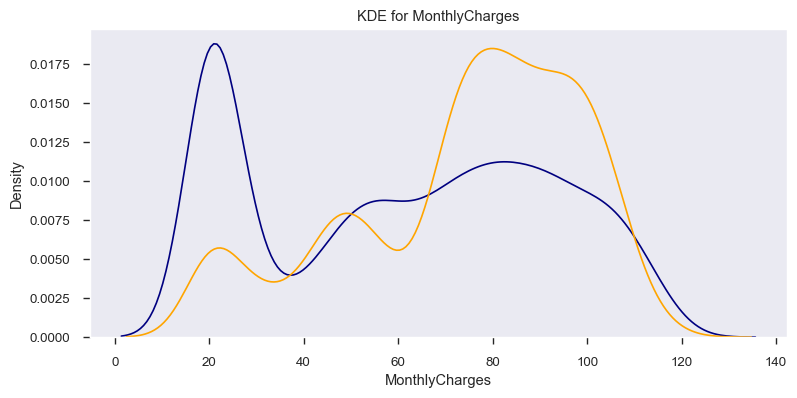

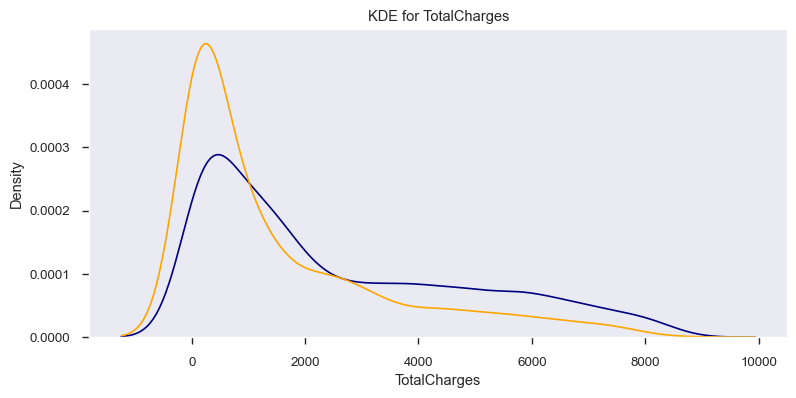

In [85]:
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

this graph shows churn customer pays higher charges in longer tenure than not churn customers

In [86]:
df_num1=df[["tenure", "MonthlyCharges", "TotalCharges"]]

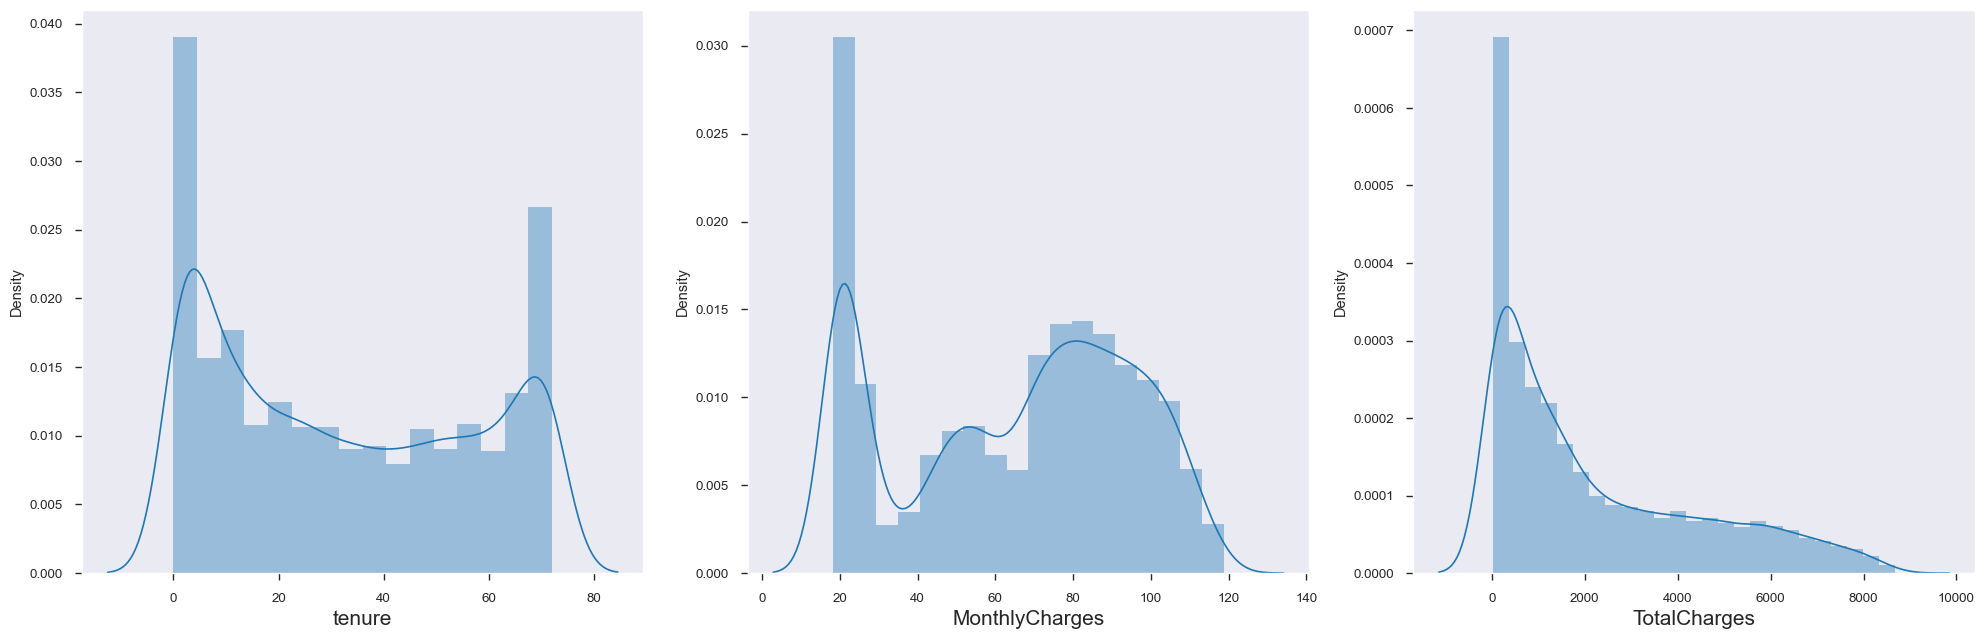

In [87]:
plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df_num1:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

in above,totalcharges has more skewness 

# DATA PRE-PROCESSING And FEATURE ENGINEERING

In [88]:
df['Churn'] = df['Churn'].replace(('Yes','No'),(0,1))

In [89]:
df

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female            no     Yes         No       1   
1     5575-GNVDE    Male            no      No         No      34   
2     3668-QPYBK    Male            no      No         No       2   
3     7795-CFOCW    Male            no      No         No      45   
4     9237-HQITU  Female            no      No         No       2   
...          ...     ...           ...     ...        ...     ...   
7038  6840-RESVB    Male            no     Yes        Yes      24   
7039  2234-XADUH  Female            no     Yes        Yes      72   
7040  4801-JZAZL  Female            no     Yes        Yes      11   
7041  8361-LTMKD    Male           yes     Yes         No       4   
7042  3186-AJIEK    Male            no      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7038         Yes         Yes             Yes        One year              Yes   
7039          No         Yes             Yes        One year              Yes   
7040          No          No              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   
7042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85      1   
1                  Mailed check          56.95      1889.50      1   
2                  Mailed check          53.85       108.15      0   
3     Bank transfer (automatic)          42.30      1840.75      1   
4              Electronic check          70.70       151.65      0   
...                         ...            ...          ...    ...   
7038               Mailed check          84.80      1990.50      1   
7039    Credit card (automatic)         103.20      7362.90      1   
7040           Electronic check          29.60       346.45      1   
7041               Mailed check          74.40       306.60      0   
7042  Bank transfer (automatic)         105.65      6844.50      1   

      tenuremonth  
0           29.85  
1         1936.30  
2          107.70  
3         1903.50  
4          141.40  
...           ...  
7038      2035.20  
7039      7430.40  
7040       325.60  
7041       297.60  
7042      6972.90  

[7043 rows x 22 columns]

In [90]:
df=df.drop(['tenuremonth','MonthlyCharges'],axis=1)

drop columns becoz it created only for analysis purpose

In [91]:
#converting string data type to int type using LabelEncoding
le=LabelEncoder()

list1=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0           5375       0              0        1           0       1   
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
3           5535       1              0        0           0      45   
4           6511       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7040        3367       0              0        1           1      11   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0                0              1                0               0   
1                1              0                0               1   
2                1              0                0               1   
3                0              1                0               1   
4                1              0                1               0   
...            ...            ...              ...             ...   
7038             1              2                0               1   
7039             1              2                1               0   
7040             0              1                0               1   
7041             1              2                1               0   
7042             1              0                1               1   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0                1                 0            0            0   
1                0                 1            0            0   
2                1                 0            0            0   
3                0                 1            1            0   
4                0                 0            0            0   
...            ...               ...          ...          ...   
7038             0                 1            1            1   
7039             1                 1            0            1   
7040             0                 0            0            0   
7041             0                 0            0            0   
7042             0                 1            1            1   

      StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0                   0         0                 1              2   
1                   0         1                 0              3   
2                   0         0                 1              3   
3                   0         1                 0              0   
4                   0         0                 1              2   
...               ...       ...               ...            ...   
7038                1         1                 1              3   
7039                1         1                 1              1   
7040                0         0                 1              2   
7041                0         0                 1              3   
7042                1         2                 1              0   

      TotalCharges  Churn  
0            29.85      1  
1          1889.50      1  
2           108.15      0  
3          1840.75      1  
4           151.65      0  
...            ...    ...  
7038       1990.50      1  
7039       7362.90      1  
7040        346.45      1  
7041        306.60      0  
7042       6844.50      1  

[7043 rows x 20 columns]

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int32  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [93]:
#find correlation co.efficient of all variables in table
df.corr()

customerID    gender  SeniorCitizen   Partner  Dependents  \
customerID          1.000000  0.006288      -0.002074 -0.026729   -0.012823   
gender              0.006288  1.000000      -0.001874 -0.001808    0.010517   
SeniorCitizen      -0.002074 -0.001874       1.000000  0.016479   -0.211185   
Partner            -0.026729 -0.001808       0.016479  1.000000    0.452676   
Dependents         -0.012823  0.010517      -0.211185  0.452676    1.000000   
tenure              0.008035  0.005106       0.016567  0.379697    0.159712   
PhoneService       -0.006483 -0.006488       0.008576  0.017706   -0.001762   
MultipleLines       0.004316 -0.006739       0.146185  0.142410   -0.024991   
InternetService    -0.012407 -0.000863      -0.032310  0.000891    0.044590   
OnlineSecurity      0.015412 -0.017021      -0.038653  0.143106    0.080972   
OnlineBackup       -0.000445 -0.013773       0.066572  0.141498    0.023671   
DeviceProtection   -0.003765 -0.002105       0.059428  0.153786    0.013963   
TechSupport         0.003848 -0.009212      -0.060625  0.119999    0.063268   
StreamingTV        -0.004493 -0.008393       0.105378  0.124666   -0.016558   
StreamingMovies    -0.012632 -0.010487       0.120176  0.117412   -0.039741   
Contract            0.015028  0.000126      -0.142554  0.294806    0.243187   
PaperlessBilling   -0.001945 -0.011754       0.156530 -0.014877   -0.111377   
PaymentMethod       0.011604  0.017352      -0.038551 -0.154798   -0.040292   
TotalCharges        0.000365 -0.000087       0.102997  0.317532    0.062124   
Churn               0.017447  0.008612      -0.150889  0.150448    0.164221   

                    tenure  PhoneService  MultipleLines  InternetService  \
customerID        0.008035     -0.006483       0.004316        -0.012407   
gender            0.005106     -0.006488      -0.006739        -0.000863   
SeniorCitizen     0.016567      0.008576       0.146185        -0.032310   
Partner           0.379697      0.017706       0.142410         0.000891   
Dependents        0.159712     -0.001762      -0.024991         0.044590   
tenure            1.000000      0.008448       0.343032        -0.030359   
PhoneService      0.008448      1.000000      -0.020538         0.387436   
MultipleLines     0.343032     -0.020538       1.000000        -0.109216   
InternetService  -0.030359      0.387436      -0.109216         1.000000   
OnlineSecurity    0.327203     -0.092893       0.131128        -0.393013   
OnlineBackup      0.360277     -0.052312       0.226910        -0.314737   
DeviceProtection  0.360653     -0.071227       0.231661        -0.306805   
TechSupport       0.324221     -0.096340       0.134768        -0.389382   
StreamingTV       0.279756     -0.022574       0.274823        -0.242532   
StreamingMovies   0.286111     -0.032959       0.279727        -0.250343   
Contract          0.671607      0.002247       0.110842         0.099721   
PaperlessBilling  0.006152      0.016505       0.165146        -0.138625   
PaymentMethod    -0.370436     -0.004184      -0.176793         0.086140   
TotalCharges      0.826164      0.113203       0.452593        -0.175771   
Churn             0.352229     -0.011942      -0.038037         0.047291   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
customerID              0.015412     -0.000445         -0.003765     0.003848   
gender                 -0.017021     -0.013773         -0.002105    -0.009212   
SeniorCitizen          -0.038653      0.066572          0.059428    -0.060625   
Partner                 0.143106      0.141498          0.153786     0.119999   
Dependents              0.080972      0.023671          0.013963     0.063268   
tenure                  0.327203      0.360277          0.360653     0.324221   
PhoneService           -0.092893     -0.052312         -0.071227    -0.096340   
MultipleLines           0.131128      0.226910          0.231661     0.134768   
InternetService        -0.393013

there is multicollinearity exists between streaming and streaming movies

<AxesSubplot:>

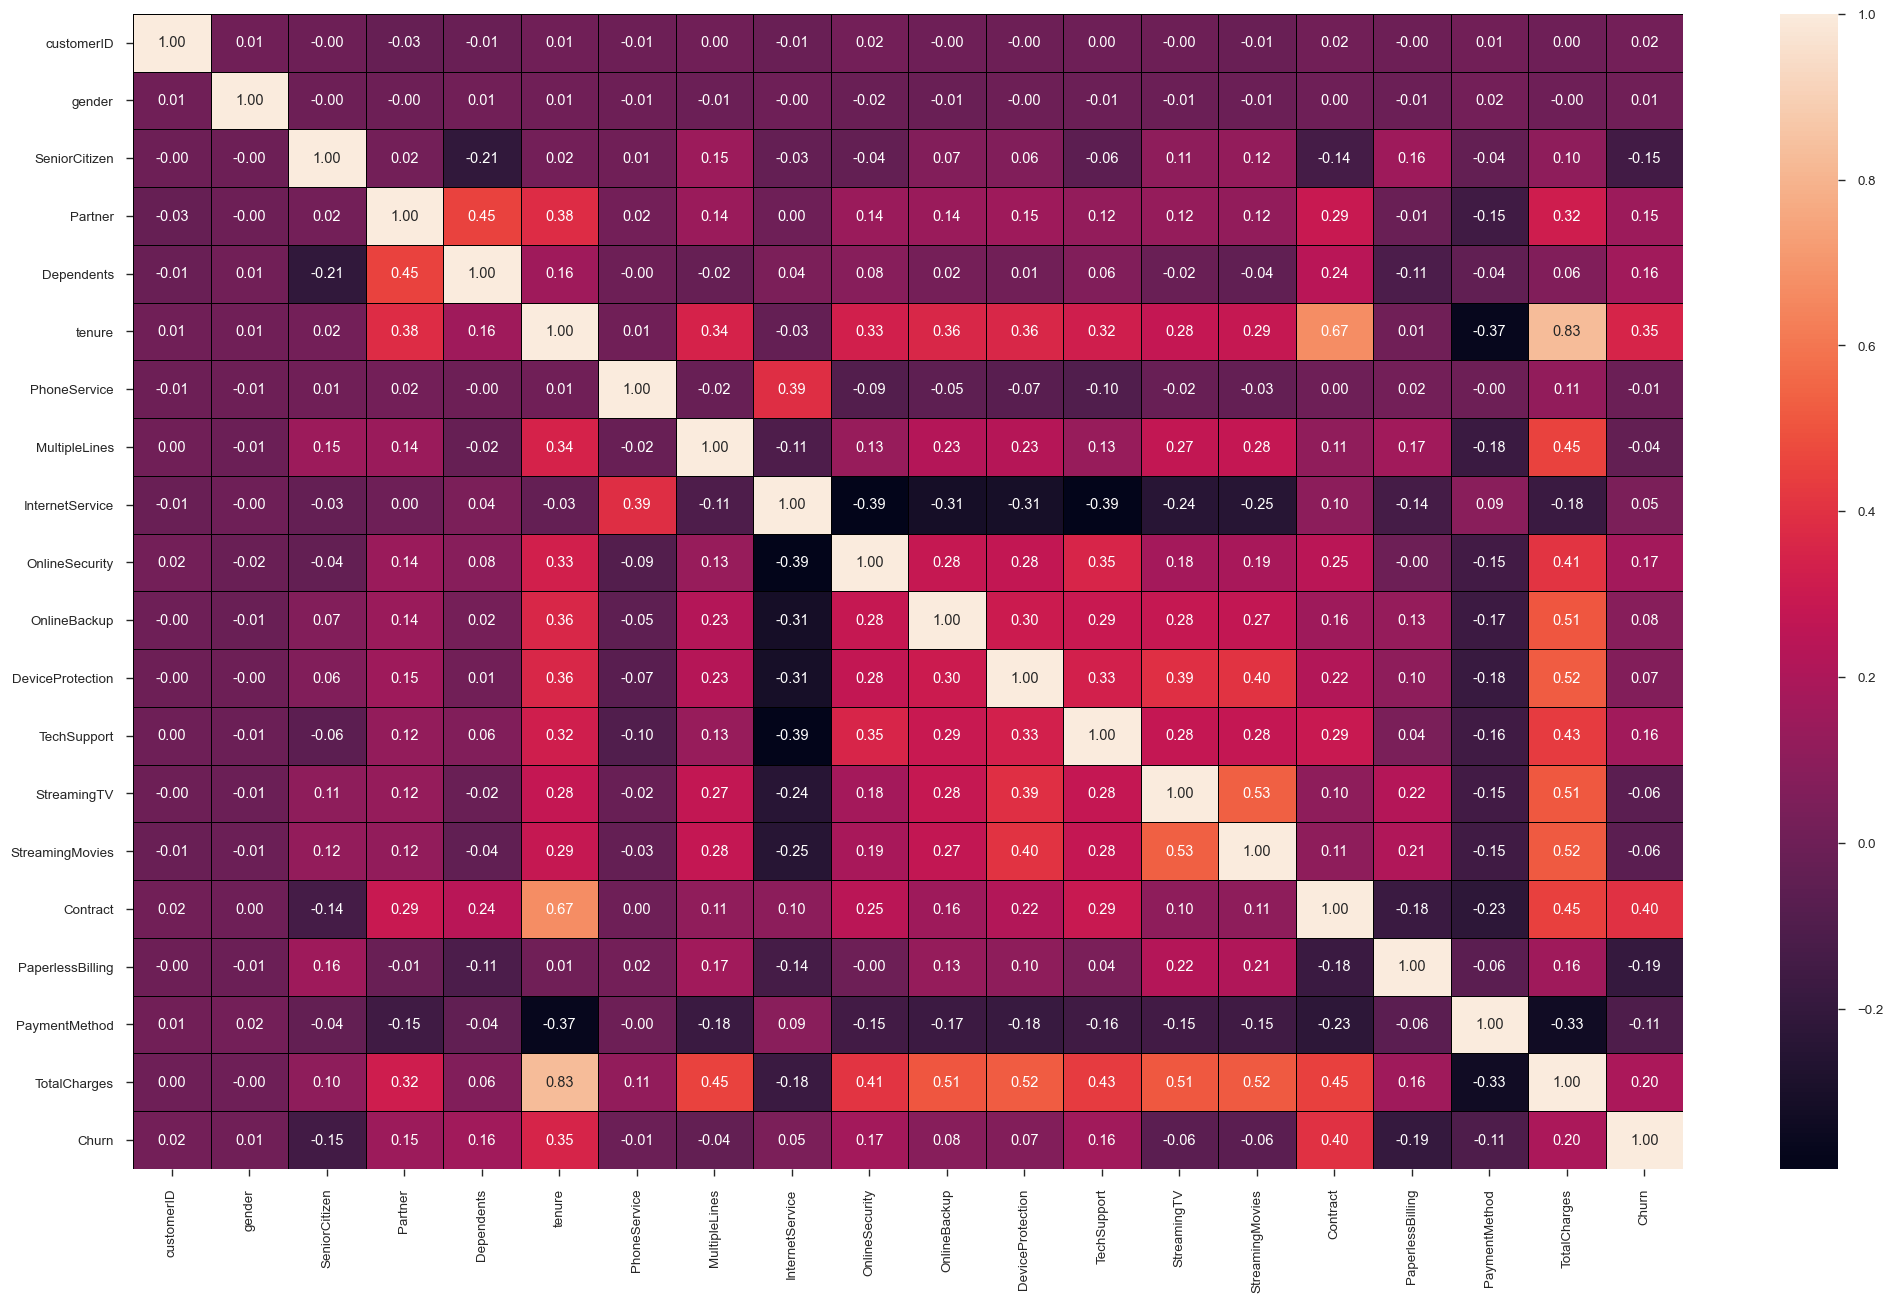

In [94]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='.2f')

contract is the most positively correlated with target.tenure and total chrages also has most correlation with target.there is no zero correlation here with target.Paperbilling,monthly charges are the most negatively correlated with the target column.senior citizen also has some negative correlation with the target column churn.

In [95]:
df.describe()

customerID       gender  SeniorCitizen      Partner   Dependents  \
count  7043.000000  7043.000000    7043.000000  7043.000000  7043.000000   
mean   3521.000000     0.504756       0.162147     0.483033     0.299588   
std    2033.283305     0.500013       0.368612     0.499748     0.458110   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%    1760.500000     0.000000       0.000000     0.000000     0.000000   
50%    3521.000000     1.000000       0.000000     0.000000     0.000000   
75%    5281.500000     1.000000       0.000000     1.000000     1.000000   
max    7042.000000     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000      0.000000       0.000000         0.000000   
25%       9.000000      1.000000       0.000000         0.000000   
50%      29.000000      1.000000       1.000000         1.000000   
75%      55.000000      1.000000       2.000000         1.000000   
max      72.000000      1.000000       2.000000         2.000000   

       OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
count     7043.000000   7043.000000       7043.000000  7043.000000   
mean         0.286668      0.344881          0.343888     0.290217   
std          0.452237      0.475363          0.475038     0.453895   
min          0.000000      0.000000          0.000000     0.000000   
25%          0.000000      0.000000          0.000000     0.000000   
50%          0.000000      0.000000          0.000000     0.000000   
75%          1.000000      1.000000          1.000000     1.000000   
max          1.000000      1.000000          1.000000     1.000000   

       StreamingTV  StreamingMovies     Contract  PaperlessBilling  \
count  7043.000000      7043.000000  7043.000000       7043.000000   
mean      0.384353         0.387903     0.690473          0.592219   
std       0.486477         0.487307     0.833755          0.491457   
min       0.000000         0.000000     0.000000          0.000000   
25%       0.000000         0.000000     0.000000          0.000000   
50%       0.000000         0.000000     0.000000          1.000000   
75%       1.000000         1.000000     1.000000          1.000000   
max       1.000000         1.000000     2.000000          1.000000   

       PaymentMethod  TotalCharges        Churn  
count    7043.000000   7043.000000  7043.000000  
mean        1.574329   2279.798992     0.734630  
std         1.068104   2266.730170     0.441561  
min         0.000000     18.800000     0.000000  
25%         1.000000    398.550000     0.000000  
50%         2.000000   1394.550000     1.000000  
75%         2.000000   3786.600000     1.000000  
max         3.000000   8684.800000     1.000000


there is so much of gap between the 75% and the max.there are outliers and skewness.
the mean and std dev is not also much close to 0

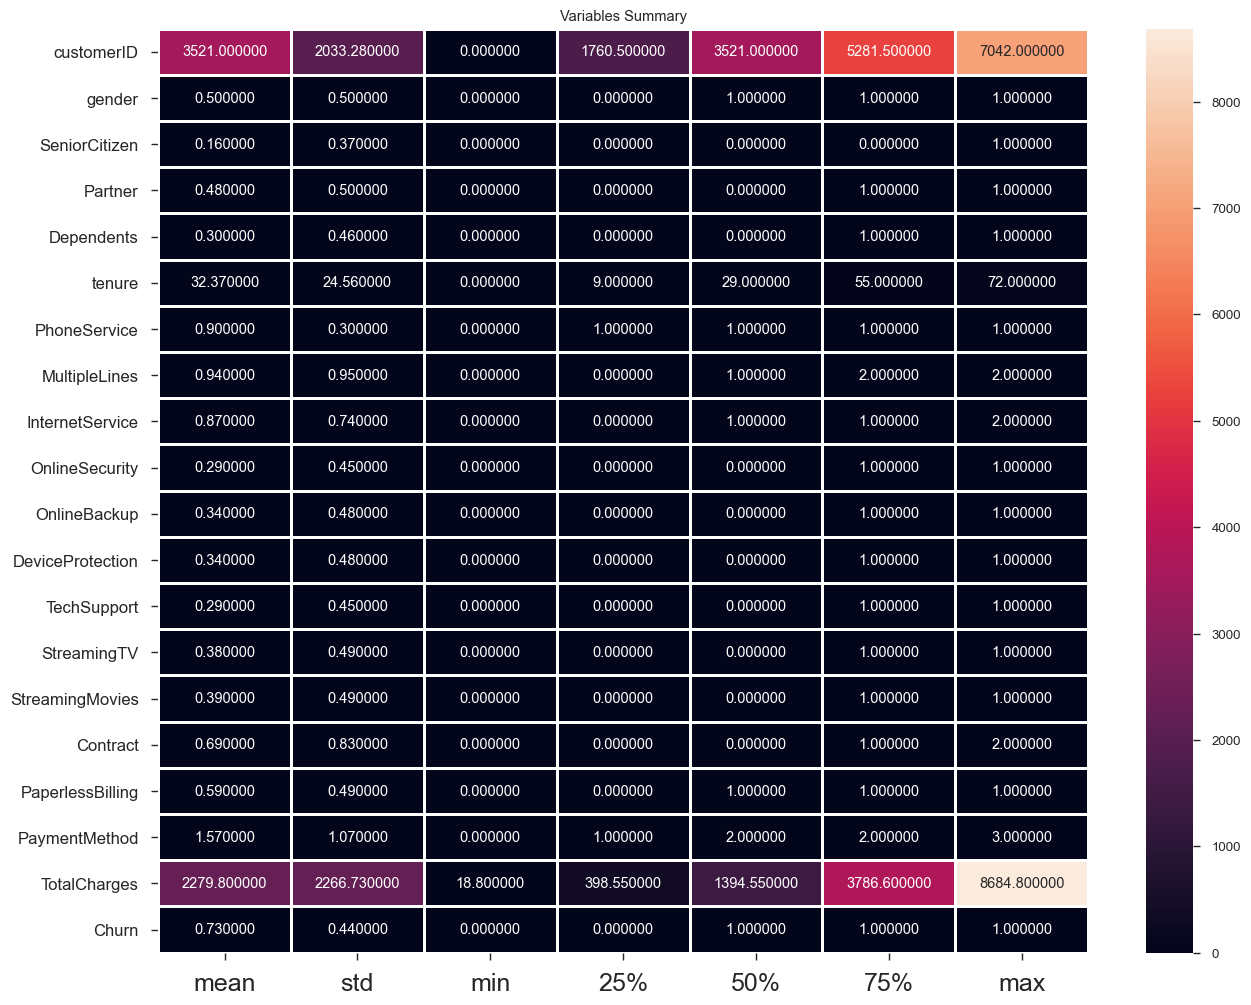

In [96]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

In [97]:
#VIF calculation
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
df.shape

(7043, 20)

In [99]:
df.shape[1]

20

In [100]:
#calculates vif
def calc_vif(df):
    vif=pd.DataFrame()
    vif['Variables']=df.columns
    vif['VIF FACTOR']=[variance_inflation_factor(df.values,i)for i in range(df.shape[1])]
    return(vif)


calc_vif(df)

Variables  VIF FACTOR
0         customerID    3.657591
1             gender    1.956689
2      SeniorCitizen    1.344851
3            Partner    2.819111
4         Dependents    1.966293
5             tenure   15.580560
6       PhoneService    9.353676
7      MultipleLines    2.525370
8    InternetService    4.409159
9     OnlineSecurity    2.010801
10      OnlineBackup    2.191422
11  DeviceProtection    2.297124
12       TechSupport    2.114154
13       StreamingTV    2.718653
14   StreamingMovies    2.742038
15          Contract    3.895120
16  PaperlessBilling    2.691358
17     PaymentMethod    3.148910
18      TotalCharges   13.713577
19             Churn    4.546837

In [101]:
df=df.drop(['StreamingMovies'],axis=1)

drop becoz this has multicollinearity

In [102]:
calc_vif(df)

Variables  VIF FACTOR
0         customerID    3.651085
1             gender    1.955682
2      SeniorCitizen    1.342674
3            Partner    2.817833
4         Dependents    1.966066
5             tenure   15.353700
6       PhoneService    9.349896
7      MultipleLines    2.520592
8    InternetService    4.400963
9     OnlineSecurity    2.008260
10      OnlineBackup    2.189944
11  DeviceProtection    2.269446
12       TechSupport    2.111295
13       StreamingTV    2.505870
14          Contract    3.891101
15  PaperlessBilling    2.665372
16     PaymentMethod    3.139010
17      TotalCharges   12.894677
18             Churn    4.544972

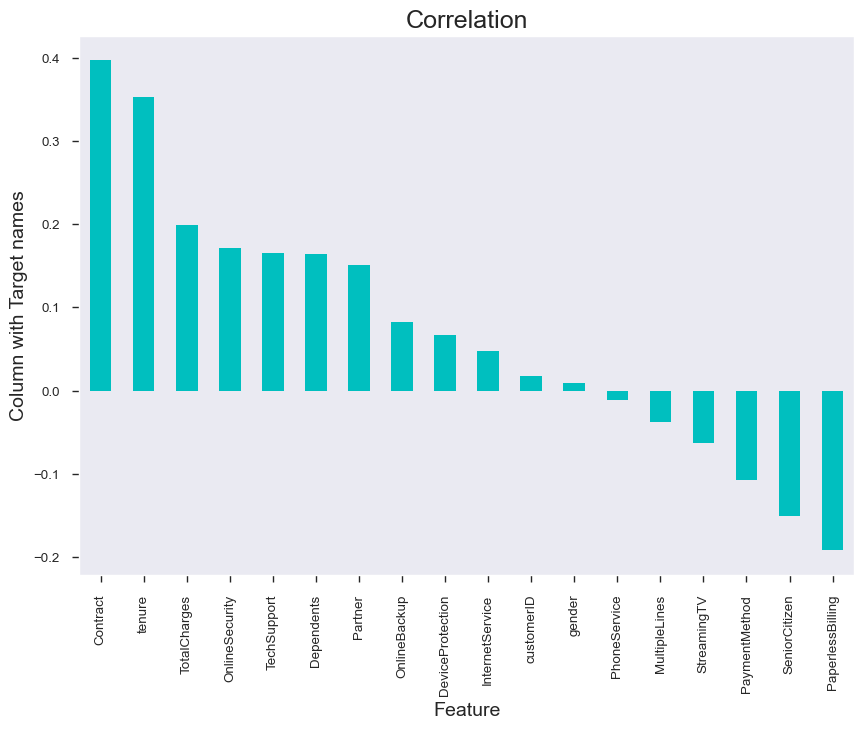

In [103]:
plt.figure(figsize=(10,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

this graph shows the positive and negative correlation of each variables with target column

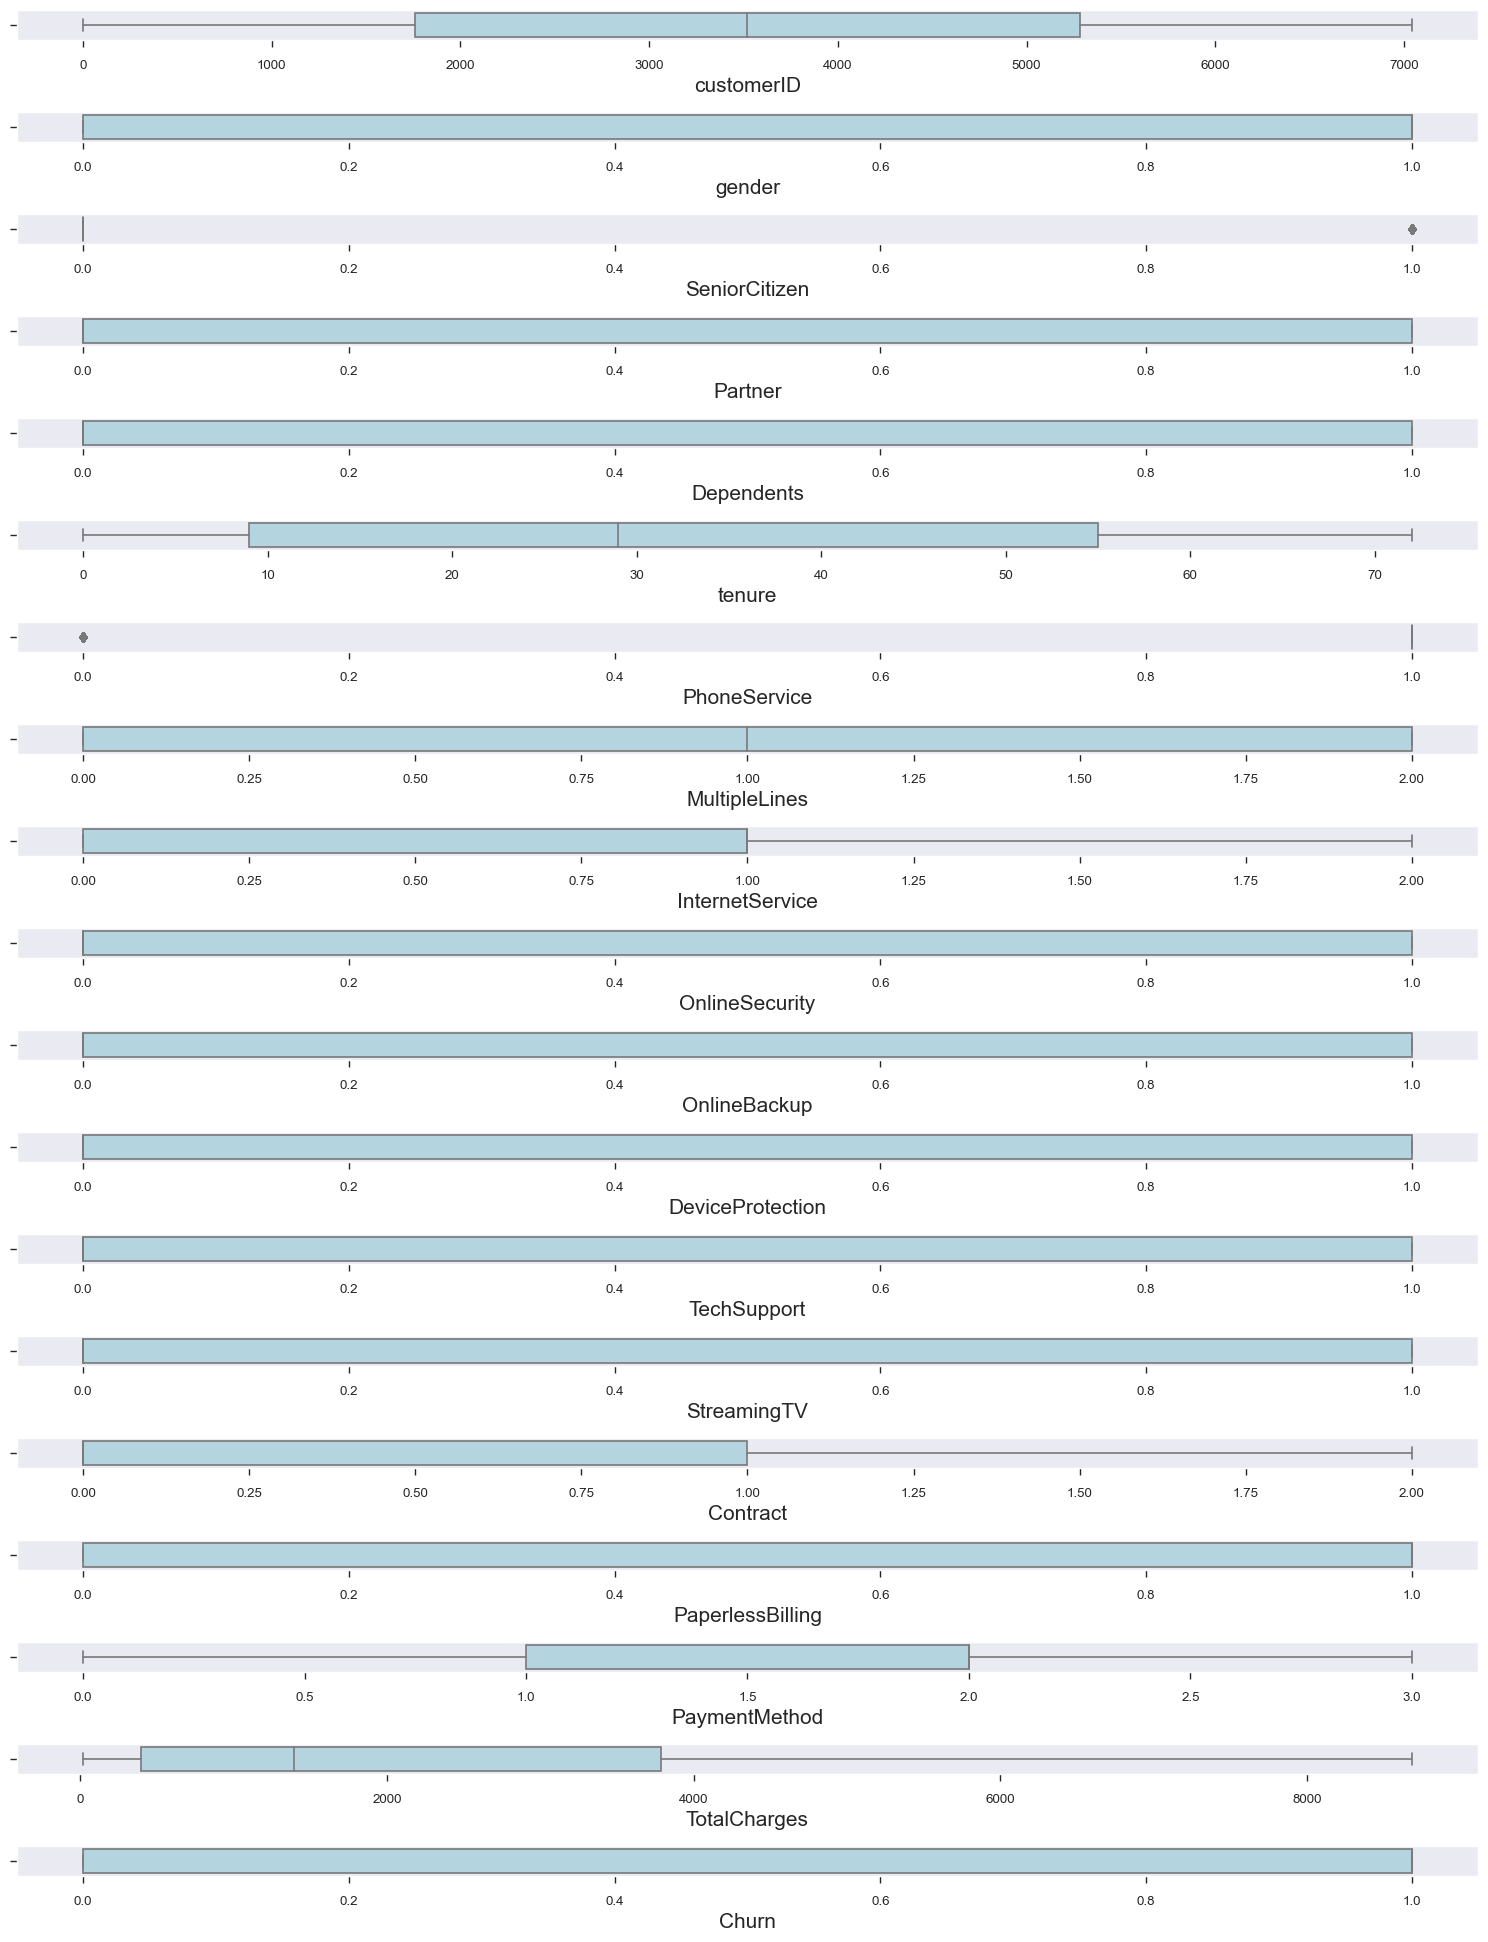

In [104]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in df:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(df[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

there are outliers present in columns

In [105]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.943722
OnlineBackup        0.652817
DeviceProtection    0.657450
TechSupport         0.924630
StreamingTV         0.475581
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
TotalCharges        0.963316
Churn              -1.063031
dtype: float64

In [106]:
df.shape

(7043, 19)

some skewness are present in the dataset

#checking Z-score to remove outliers

In [107]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(7043, 19)

In [108]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [109]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7043, 19)
(6361, 19)


some outliers got removed

In [110]:
#finds data loss
loss_percent=(7043-6361)/(7043*100)
print(loss_percent)

0.0009683373562402386


since data percentage loss is too low and its cleaned now

In [111]:
df_new


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
1           3962       1              0        0           0      34   
2           2564       1              0        0           0       2   
4           6511       0              0        0           0       2   
5           6551       0              0        0           0       8   
6           1002       1              0        0           1      22   
...          ...     ...            ...      ...         ...     ...   
7037        1758       0              0        0           0      72   
7038        4853       1              0        1           1      24   
7039        1525       0              0        1           1      72   
7041        5934       1              1        1           0       4   
7042        2226       1              0        0           0      66   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
1                1              0                0               1   
2                1              0                0               1   
4                1              0                1               0   
5                1              2                1               0   
6                1              2                1               0   
...            ...            ...              ...             ...   
7037             1              0                2               0   
7038             1              2                0               1   
7039             1              2                1               0   
7041             1              2                1               0   
7042             1              0                1               1   

      OnlineBackup  DeviceProtection  TechSupport  StreamingTV  Contract  \
1                0                 1            0            0         1   
2                1                 0            0            0         0   
4                0                 0            0            0         0   
5                0                 1            0            1         0   
6                1                 0            0            1         0   
...            ...               ...          ...          ...       ...   
7037             0                 0            0            0         2   
7038             0                 1            1            1         1   
7039             1                 1            0            1         1   
7041             0                 0            0            0         0   
7042             0                 1            1            1         2   

      PaperlessBilling  PaymentMethod  TotalCharges  Churn  
1                    0              3       1889.50      1  
2                    1              3        108.15      0  
4                    1              2        151.65      0  
5                    1              2        820.50      0  
6                    1              1       1949.40      1  
...                ...            ...           ...    ...  
7037                 1              0       1419.40      1  
7038                 1              3       1990.50      1  
7039                 1              1       7362.90      1  
7041                 1              3        306.60      0  
7042                 1              0       6844.50      1  

[6361 rows x 19 columns]

In [112]:
df_new.shape

(6361, 19)

In [113]:
#seggregate input data and output data
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [114]:
print(f'Ratio of Churn:  {y.sum()/len(y)*100:.2f}%')

Ratio of Churn:  73.29%


# SKEWNESS REMOVAL AND SCALING

In [115]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.30313384,  0.99263832, -0.44159123, ..., -1.21176486,
         1.31916733,  0.22566284],
       [-0.35817008,  0.99263832, -0.44159123, ...,  0.82524261,
         1.31916733, -1.39531734],
       [ 1.35238168, -1.00741628, -0.44159123, ...,  0.82524261,
         0.41100623, -1.25996398],
       ...,
       [-0.92323829, -1.00741628, -0.44159123, ...,  0.82524261,
        -0.52011602,  1.52585714],
       [ 1.12752839,  0.99263832,  2.26453771, ...,  0.82524261,
         1.31916733, -0.93696205],
       [-0.53290672,  0.99263832, -0.44159123, ...,  0.82524261,
        -1.48777569,  1.44401815]])

In [116]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [117]:
#importing module-------scaling
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values
print(new_xtrain)
print(new_xtest)

[[0.85166919 1.         1.         ... 1.         0.67645902 0.86535569]
 [0.87653925 1.         0.         ... 0.         1.         0.46321686]
 [0.70556676 1.         0.         ... 0.         1.         0.68994941]
 ...
 [0.75232672 0.         0.         ... 0.         0.         0.60728063]
 [0.87590255 1.         0.         ... 1.         1.         0.32254929]
 [0.90017345 0.         0.         ... 1.         1.         0.24498025]]
[[0.31581207 1.         1.         ... 1.         0.         0.85143483]
 [0.44011682 1.         0.         ... 1.         1.         0.06604862]
 [0.10840053 1.         0.         ... 1.         0.         0.34507768]
 ...
 [0.43558078 1.         0.         ... 1.         0.         0.50216296]
 [0.05183852 1.         0.         ... 0.         0.         0.3930727 ]
 [0.33092538 0.         0.         ... 1.         0.67645902 0.57361549]]


## Checking Skewness using Distribution

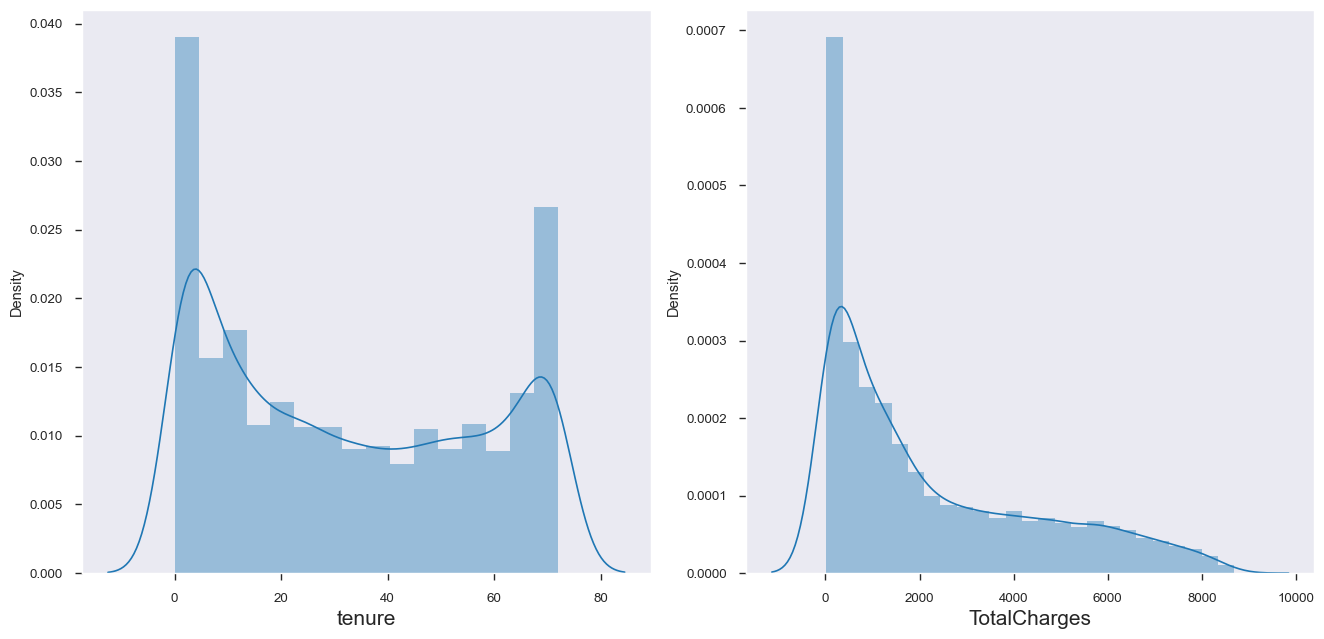

In [118]:
df_num1=df[["tenure", "TotalCharges"]]

plt.figure(figsize = (20, 25))
plotnumber = 1

for col in df_num1:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Resampling Technique

# Over Sampling

In [119]:
##The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones)
###so we are balancing the classes with smote technique

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=1)
x_train_res, y_train_res = sm.fit_resample(new_xtrain, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 3718
Before OverSampling, counts of label '0': 1370 

After OverSampling, the shape of train_X: (7436, 18)
After OverSampling, the shape of train_y: (7436,) 

After OverSampling, counts of label '1': 3718
After OverSampling, counts of label '0': 3718


# MODEL PREDICTION

# LOGSITIC REGRESSION

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [121]:
lr=LogisticRegression()




In [122]:
for i in range(0,100):
   
    lr.fit(x_train_res, y_train_res.ravel())
    pred_train=lr.predict(x_train_res)
    pred_test=lr.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train)*100,1)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test)*100,1)
        
        
        
   

# cv score

In [123]:
from sklearn.model_selection import cross_val_score
acc_score=accuracy_score(y_test,pred_test)
for j in range(2,10):
    cross_V_score=cross_val_score(lr,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score*100)
    print("accuracy score is:",acc_score*100)
    print("\n")
        

At cv:- 2
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268


At cv:- 3
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268


At cv:- 4
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268


At cv:- 5
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268


At cv:- 6
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268


At cv:- 7
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268


At cv:- 8
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268


At cv:- 9
cross validation score is: 72.2702278083268
accuracy score is: 72.2702278083268




# Hyper parameter Tuning

In [124]:
#performs GridsearchCV logistic regression
from sklearn.model_selection import GridSearchCV
parameters={'dual':[False,True],'fit_intercept':[True,False],'random_state':list(range(0,1)),'max_iter':[100,50], 'tol':[0.001,0.01]}
lr=LogisticRegression()
clf=GridSearchCV(lr,parameters)
clf.fit(x_train_res,y_train_res)
print(clf.best_params_)


{'dual': False, 'fit_intercept': True, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [125]:
lr=LogisticRegression(fit_intercept= False, dual=False, max_iter= 100, random_state=0, tol= 0.001)
lr.fit(x_train_res,y_train_res.ravel())
pred_test_lr=lr.predict(new_xtest)
pred_train_lr=lr.predict(x_train_res)
lr_score = lr.score(x_train_res,y_train_res)
lr_acc_score=accuracy_score(y_test,pred_test_lr)
print("Accuracy score is:",lr_acc_score*100)
print("score of model is:",lr_score*100)

Accuracy score is: 73.4485467399843
score of model is: 77.15169445938676


## CV Score

In [126]:
cv_score_lr=cross_val_score(lr,x,y,cv=5)
cv_mean_lr=cv_score_lr.mean()
print("cv_mean is:",cv_mean_lr*100)

cv_mean is: 67.41061326930394


In [127]:
print(classification_report(y_test, pred_test_lr)) 

              precision    recall  f1-score   support

           0       0.49      0.81      0.61       329
           1       0.91      0.71      0.80       944

    accuracy                           0.73      1273
   macro avg       0.70      0.76      0.70      1273
weighted avg       0.80      0.73      0.75      1273



In [128]:
print(confusion_matrix(y_test,pred_test_lr))

[[266  63]
 [275 669]]


In [129]:
print(accuracy_score(y_test,pred_test_lr)*100)

73.4485467399843


## AUC-ROC Curve

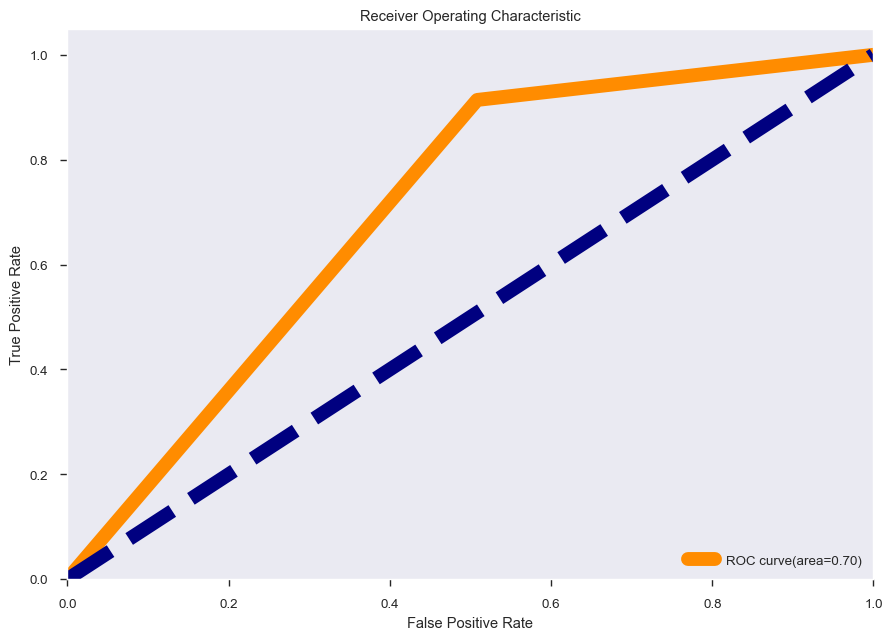

In [130]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lr,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

# RANDOM FOREST CLASSIFIER

In [131]:
# importing modules

from sklearn.ensemble import RandomForestClassifier

#creating RandomForestClassifier constructor
rf = RandomForestClassifier(random_state=5)
# fit data
rf.fit(x_train_res,y_train_res.ravel())
# predicting score
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
#calculates score of the model using score method
rf_score = rf.score(new_xtest,y_test)
print('score of model is : ',rf_score*100)

score of model is :  77.37627651217596


In [132]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_rf)*100)

        

Accuracy Score of Training Data is: 99.98655190962883
Accuracy Score of Testing Data is: 77.37627651217596


In [133]:
#choosing best Random state
for i in range(0,100):
    rf.fit(x_train_res, y_train_res.ravel())
    pred_train_rf=rf.predict(x_train_res)
    pred_test_rf=rf.predict(new_xtest)
    if round(accuracy_score(y_train_res.ravel(),pred_train_rf)*100,1)== round(accuracy_score(y_test,pred_test_rf)*100,1):
        print("At random state ",i,"model performs well")
        print("At random state:-",i)
        print("Training r2_score is :-",accuracy_score(y_train_res.ravel(),pred_train_rf)*100)
        print("Testing r2_score is :-",accuracy_score(y_test,pred_test_rf)*100)
        

In [134]:
print("accuracy score is:",accuracy_score(y_test,pred_test_rf)*100)

accuracy score is: 77.37627651217596


In [135]:
#cross validation 
from sklearn.model_selection import cross_val_score
acc_score_rf=accuracy_score(y_test,pred_test_rf)
for j in range(2,10):
    cross_V_score=cross_val_score(rf,x,y,cv=j)
    print("At cv:-",j)
    print("cross validation score is:",acc_score_rf*100)
    print("accuracy score is:",acc_score_rf*100)
    print("\n")
        

At cv:- 2
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596


At cv:- 3
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596


At cv:- 4
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596


At cv:- 5
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596


At cv:- 6
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596


At cv:- 7
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596


At cv:- 8
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596


At cv:- 9
cross validation score is: 77.37627651217596
accuracy score is: 77.37627651217596




## parameter tuning

In [136]:
#performs GridSearchCV on RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'bootstrap':[True,False]}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50, 'random_state': 0}


In [137]:
rf=RandomForestClassifier(criterion="gini",max_features="auto",n_estimators=100,random_state=0,bootstrap="True",min_weight_fraction_leaf= 0.1)
rf.fit(x_train_res,y_train_res.ravel())
pred_test_rf=rf.predict(new_xtest)
pred_train_rf=rf.predict(x_train_res)
rf_score = rf.score(x_train_res,y_train_res)
rf_acc_score=accuracy_score(y_test,pred_test_rf)
print("Accuracy score is:",rf_acc_score*100)
print("score of model is:",rf_score*100)

Accuracy score is: 73.29143754909663
score of model is: 77.74341043571813


## CV Score

In [138]:
cv_score_rf=cross_val_score(rf,x,y,cv=5)
cv_mean_rf=cv_score_rf.mean()
print("cv_mean is:",cv_mean_rf*100)

cv_mean is: 76.48175458358654


In [139]:
print(confusion_matrix(y_test,pred_test_rf))

[[261  68]
 [272 672]]


In [140]:
print(classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

           0       0.49      0.79      0.61       329
           1       0.91      0.71      0.80       944

    accuracy                           0.73      1273
   macro avg       0.70      0.75      0.70      1273
weighted avg       0.80      0.73      0.75      1273



## AUC-ROC CURVE:

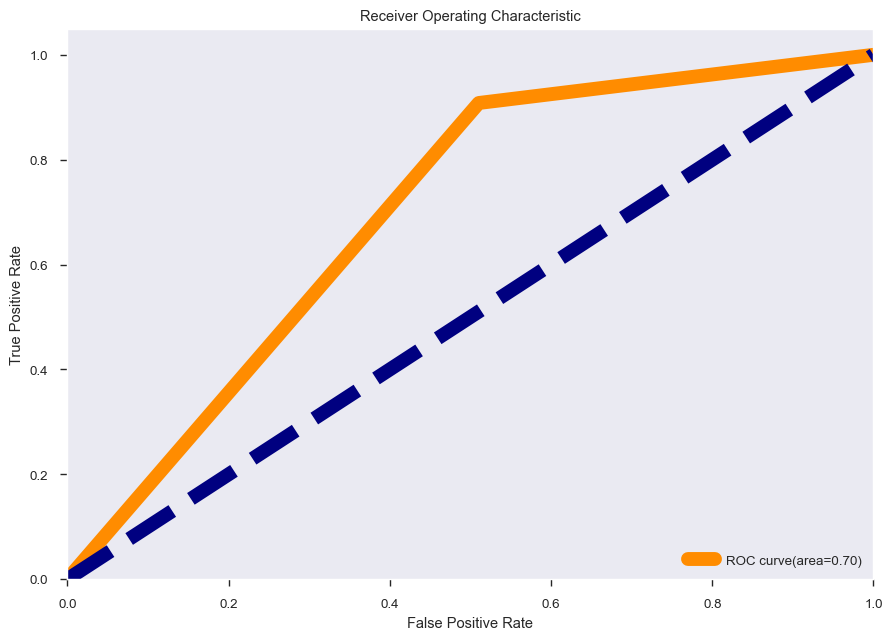

In [141]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_rf,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

# DECISION TREE CLASSIFIER

In [142]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train_res, y_train_res.ravel())
pred_test_dtc = dtc.predict(new_xtest)
pred_train_dtc = dtc.predict(x_train_res)
dtc_score = dtc.score(new_xtest,y_test)
print('score of model is : ',dtc_score*100)



score of model is :  72.74155538098978


In [143]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_dtc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_dtc)*100)


Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 72.74155538098978


parameter tuning

In [144]:
#perform gridsearchcv and cross val score on Decison Tree DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
parameters={'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,10)),'max_depth':[11],'min_samples_split': [2,3,4],'min_samples_leaf':[1,2,3] }
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 9, 'splitter': 'best'}


In [145]:
dt=DecisionTreeClassifier(criterion='entropy',max_features= 'auto',max_depth= 11 , random_state= 5, splitter= 'best',min_samples_leaf= 1,min_samples_split= 2)
dt.fit(x_train_res,y_train_res.ravel())
pred_test_dt=dt.predict(new_xtest)
pred_train_dt=dt.predict(x_train_res)
dt_score = dt.score(x_train_res,y_train_res.ravel())
dt_acc_score=accuracy_score(y_test,pred_test_dt)
print("Accuracy score is:",dt_acc_score*100)
print("score of model is:",dt_score*100)

Accuracy score is: 73.84131971720346
score of model is: 86.16191500806886


## CV Score

In [146]:
cv_score_dt=cross_val_score(dt,x,y,cv=5)
cv_mean_dt=cv_score_dt.mean()
print("cv_mean is:",cv_mean_dt*100)

cv_mean is: 75.75857060279536


In [147]:
print(confusion_matrix(y_test,pred_test_dt))

[[239  90]
 [243 701]]


In [148]:
print(classification_report(y_test,pred_test_dt))

              precision    recall  f1-score   support

           0       0.50      0.73      0.59       329
           1       0.89      0.74      0.81       944

    accuracy                           0.74      1273
   macro avg       0.69      0.73      0.70      1273
weighted avg       0.79      0.74      0.75      1273



## AUC-ROC CURVE:

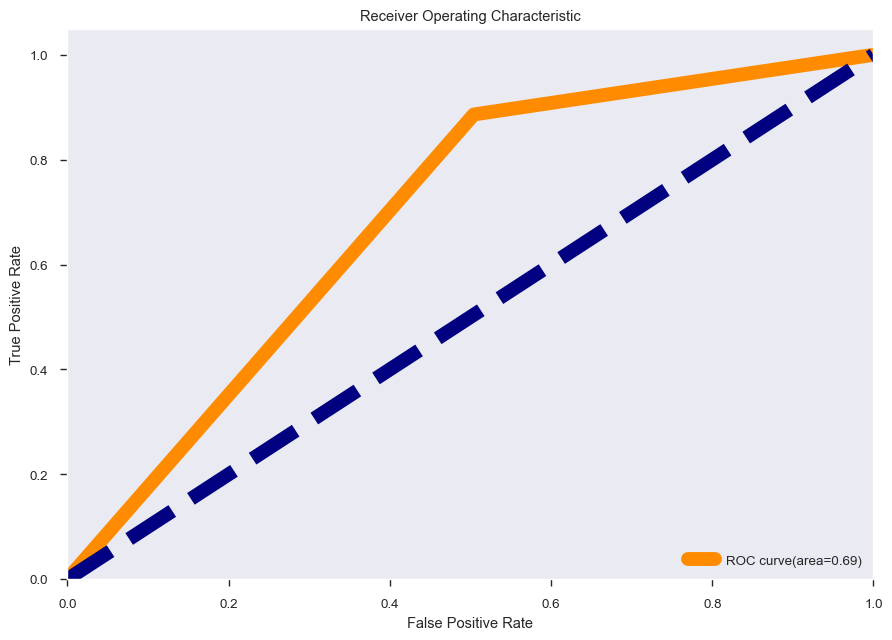

In [149]:
# ROC_AUC CURVE
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_dt,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

# KNEIGHBORS CLASSIFIER

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res.ravel())
pred_test_knn = knn.predict(new_xtest)
pred_train_knn = knn.predict(x_train_res)
knn_score = knn.score(new_xtest,y_test)
print('score of model is : ',knn_score*100)



score of model is :  68.49960722702278


In [151]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_knn)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_knn)*100)


Accuracy Score of Training Data is: 85.610543302851
Accuracy Score of Testing Data is: 68.49960722702278


## parameter tuning

In [152]:
#perform gridsearchcv and cross val score on KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':[4,5,6],'weights':['uniform', 'distance'],'leaf_size':[35,30],'n_jobs':[-1,1],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }
knn=KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 35, 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}


In [153]:
knn=KNeighborsClassifier(algorithm= 'auto', leaf_size= 35, n_jobs= -1, n_neighbors= 4, weights= 'distance')
knn.fit(x_train_res,y_train_res.ravel())
pred_test_knn=knn.predict(new_xtest)
pred_train_knn=knn.predict(x_train_res)
knn_score = knn.score(x_train_res,y_train_res.ravel())
knn_acc_score=accuracy_score(y_test,pred_test_knn)
print("Accuracy score is:",knn_acc_score*100)
print("score of model is:",knn_score*100)

Accuracy score is: 69.44226237234878
score of model is: 100.0


## CV Score

In [154]:
cv_score_knn=cross_val_score(knn,x,y,cv=5)
cv_mean_knn=cv_score_knn.mean()
print("cv_mean is:",cv_mean_knn*100)

cv_mean is: 74.65795402332922


In [155]:
print(confusion_matrix(y_test,pred_test_knn))

[[200 129]
 [260 684]]


In [156]:
print(classification_report(y_test,pred_test_knn))

              precision    recall  f1-score   support

           0       0.43      0.61      0.51       329
           1       0.84      0.72      0.78       944

    accuracy                           0.69      1273
   macro avg       0.64      0.67      0.64      1273
weighted avg       0.74      0.69      0.71      1273



## AUC-ROC CURVE:

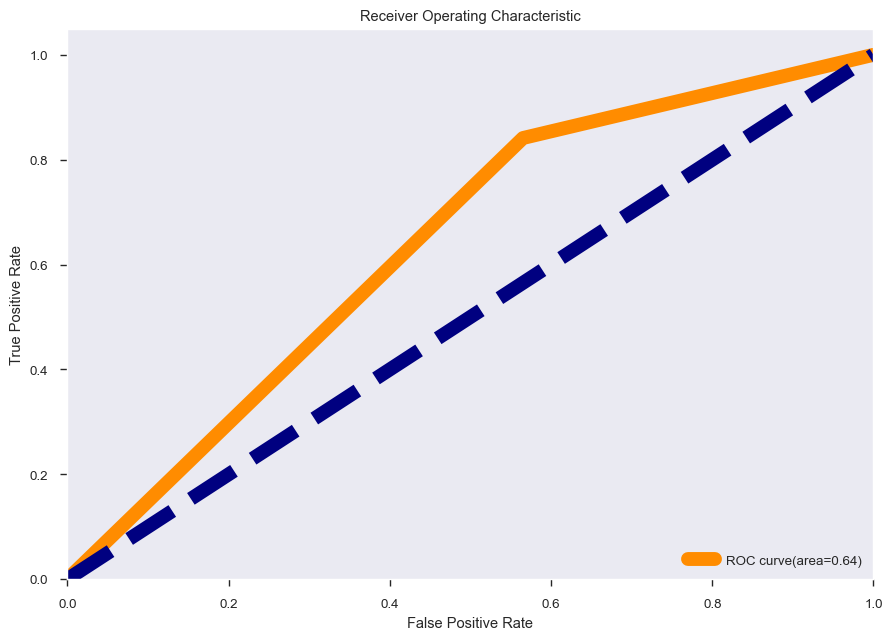

In [157]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_knn,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 65%

# GAUSSIANNB

In [158]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(x_train_res, y_train_res.ravel())
pred_test_gnb = gnb.predict(new_xtest)
pred_train_gnb = gnb.predict(x_train_res)
gnb_score = gnb.score(new_xtest,y_test)
print('score of model is : ',gnb_score*100)

score of model is :  73.84131971720346


In [159]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gnb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gnb)*100)


Accuracy Score of Training Data is: 75.45723507261968
Accuracy Score of Testing Data is: 73.84131971720346


## parameter tuning

In [160]:
#perform gridsearchcv and cross val score on GaussianNB
from sklearn.model_selection import GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb=GaussianNB() 
clf = GridSearchCV(estimator=gnb, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.004328761281083057}


In [161]:
gnb=GaussianNB(var_smoothing=0.15199110829529336)
gnb.fit(x_train_res,y_train_res.ravel())
pred_test_gnb=gnb.predict(new_xtest)
pred_train_gnb=gnb.predict(x_train_res)
gnb_score = gnb.score(x_train_res,y_train_res.ravel())
gnb_acc_score=accuracy_score(y_test,pred_test_gnb)
print("Accuracy score is:",gnb_acc_score*100)
print("score of model is:",gnb_score*100)

Accuracy score is: 72.42733699921445
score of model is: 74.86551909628832


## CV Score

In [162]:
cv_score_gnb=cross_val_score(gnb,x,y,cv=5)
cv_mean_gnb=cv_score_gnb.mean()
print("cv_mean is:",cv_mean_gnb*100)




cv_mean is: 74.24942072161535


In [163]:
print(confusion_matrix(y_test,pred_test_gnb))

[[270  59]
 [292 652]]


In [164]:
print(classification_report(y_test,pred_test_gnb))

              precision    recall  f1-score   support

           0       0.48      0.82      0.61       329
           1       0.92      0.69      0.79       944

    accuracy                           0.72      1273
   macro avg       0.70      0.76      0.70      1273
weighted avg       0.80      0.72      0.74      1273



## AUC-ROC CURVE:

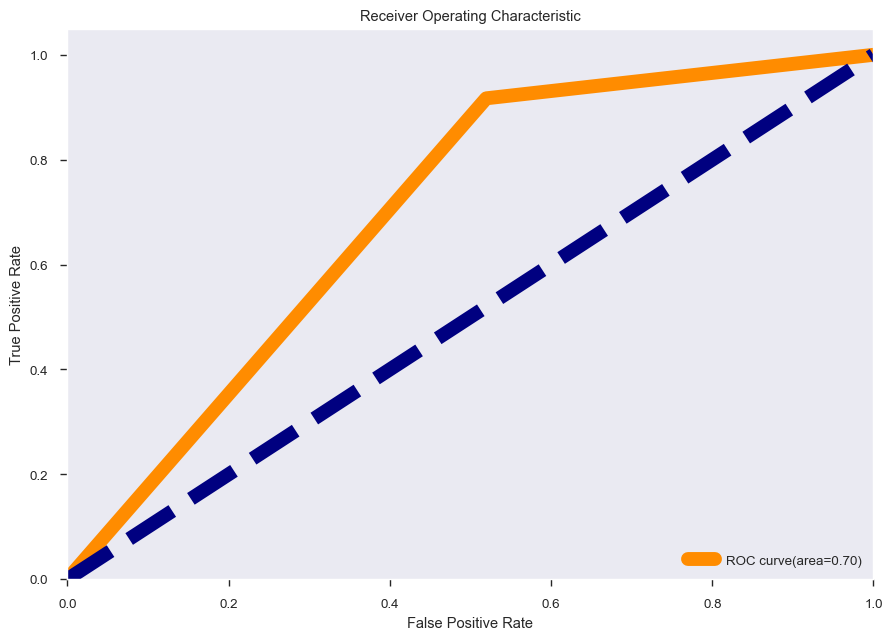

In [165]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gnb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 70%

# SUPPROT VECTOR CLASSIFIER

In [166]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train_res, y_train_res.ravel())
pred_test_svc = svc.predict(new_xtest)
pred_train_svc = svc.predict(x_train_res)
svc_score = svc.score(new_xtest,y_test)
print('score of model is : ',svc_score*100)

score of model is :  75.72663000785546


In [167]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_svc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_svc)*100)


Accuracy Score of Training Data is: 83.7547068316299
Accuracy Score of Testing Data is: 75.72663000785546


## parameter tuning

In [168]:
#perform gridsearchcv and cross val score on Support Vector classifier

parameters ={'kernel':['linear','rbf'],'tol':[0.01,0.001],'shrinking':[True,False],'max_iter':[1,-1],'probability':[True,False]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'shrinking': True, 'tol': 0.01}


In [169]:
svc=SVC(kernel='rbf',max_iter= -1, probability= True, shrinking= True, tol= 0.01)
svc.fit(x_train_res,y_train_res.ravel())
pred_test_svc=svc.predict(new_xtest)
pred_train_svc=svc.predict(x_train_res)
svc_score = svc.score(x_train_res,y_train_res.ravel())
svc_acc_score=accuracy_score(y_test,pred_test_svc)
print("Accuracy score is:",svc_acc_score*100)
print("score of model is:",svc_score*100)

Accuracy score is: 75.72663000785546
score of model is: 83.76815492200109


## CV Score

In [170]:
cv_score_svc=cross_val_score(svc,x,y,cv=5)
cv_mean_svc=cv_score_svc.mean()
print("cv_mean is:",cv_mean_svc*100)

cv_mean is: 79.81443329529118


In [171]:
print(confusion_matrix(y_test,pred_test_svc))

[[232  97]
 [212 732]]


In [172]:
print(classification_report(y_test,pred_test_svc))

              precision    recall  f1-score   support

           0       0.52      0.71      0.60       329
           1       0.88      0.78      0.83       944

    accuracy                           0.76      1273
   macro avg       0.70      0.74      0.71      1273
weighted avg       0.79      0.76      0.77      1273



##  AUC-ROC CURVE:

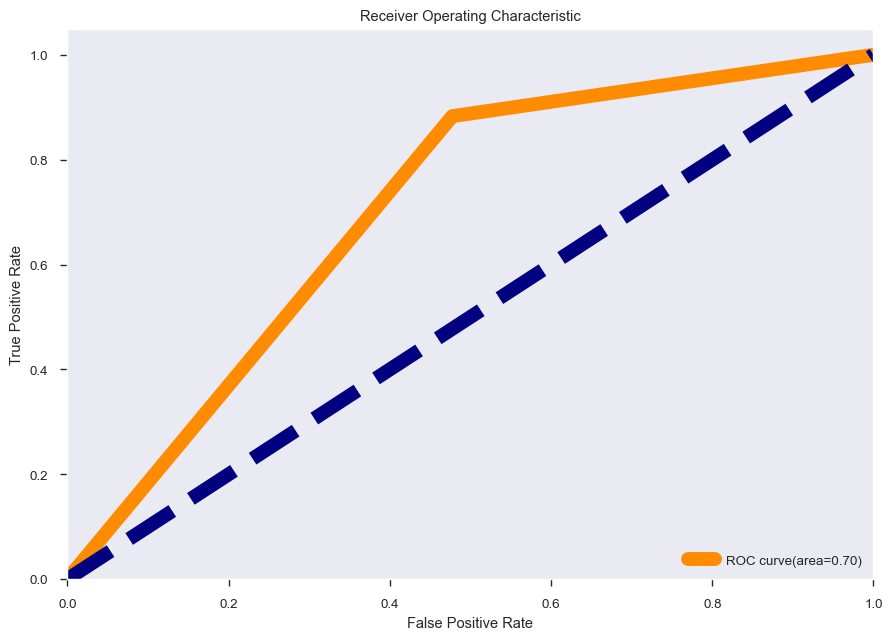

In [173]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_svc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 71%

# GRADIENT BOOSTING CLASSIFIER

In [174]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=7)
gb.fit(x_train_res, y_train_res)
pred_test_gb = gb.predict(new_xtest)
pred_train_gb = gb.predict(x_train_res)
gb_score = gb.score(new_xtest,y_test)
print('score of model is : ',gb_score*100)




score of model is :  79.02592301649646


In [175]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_gb)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_gb)*100)

Accuracy Score of Training Data is: 85.85260892953201
Accuracy Score of Testing Data is: 79.02592301649646


## parameter tuning

In [176]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['squared_error','mse'],'n_estimators':[150],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2] }
gb=GradientBoostingClassifier()
clf=GridSearchCV(gb,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'criterion': 'squared_error', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 150, 'random_state': 0}


In [177]:
gb=GradientBoostingClassifier(criterion="squared_error",n_estimators=150,random_state=0,min_weight_fraction_leaf= 0.1)
gb.fit(x_train_res,y_train_res.ravel())
pred_test_gb=gb.predict(new_xtest)
pred_train_gb=gb.predict(x_train_res)
gb_score = gb.score(x_train_res,y_train_res.ravel())
gb_acc_score=accuracy_score(y_test,pred_test_gb)
print("Accuracy score is:",gb_acc_score*100)
print("score of model is:",gb_score*100)

Accuracy score is: 78.3974862529458
score of model is: 83.37816030123723


## CV Score

In [178]:
cv_score_gb=cross_val_score(gb,x,y,cv=5)
cv_mean_gb=cv_score_gb.mean()
print("cv_mean is:",cv_mean_gb*100)

cv_mean is: 80.49039805935564


In [179]:
print(confusion_matrix(y_test,pred_test_gb))

[[240  89]
 [186 758]]


In [180]:
print(classification_report(y_test,pred_test_gb))

              precision    recall  f1-score   support

           0       0.56      0.73      0.64       329
           1       0.89      0.80      0.85       944

    accuracy                           0.78      1273
   macro avg       0.73      0.77      0.74      1273
weighted avg       0.81      0.78      0.79      1273



## AUC-ROC CURVE:

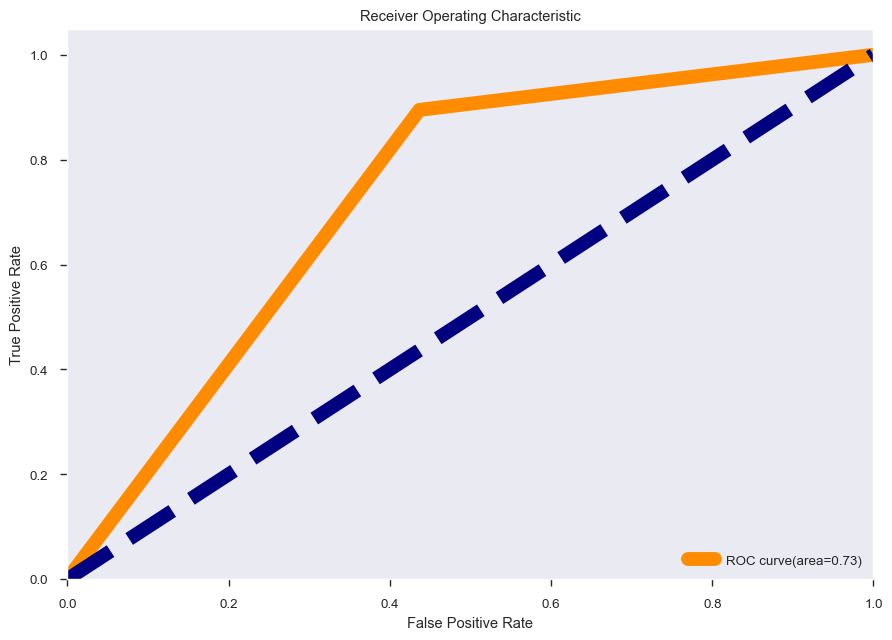

In [181]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_gb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 73%

# LIGHT GRADIENT BOOSTING CLASSIFIER

In [182]:
!pip install lightgbm

In [183]:
#Light Gradient Boosting Classifier

In [184]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(x_train_res, y_train_res.ravel())
pred_test_lgbm = lgbm.predict(new_xtest)
pred_train_lgbm = lgbm.predict(x_train_res)
lgbm_score = lgbm.score(new_xtest,y_test)
print('score of model is : ',lgbm_score*100)



score of model is :  78.47604084838963


In [185]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_lgbm)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_lgbm)*100)


Accuracy Score of Training Data is: 91.13770844540076
Accuracy Score of Testing Data is: 78.47604084838963


## Parameter Tuning

In [186]:
from sklearn.model_selection import GridSearchCV
parameters={'num_leaves': [31, 127],'reg_alpha': [0.1, 0.5],'max_depth':[5,200],'learning_rate': [0,1],'boosting_type':['gbdt', 'dart', 'goss'],'metric':['mae']}
lgbm=LGBMClassifier()
clf=GridSearchCV(lgbm,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)


{'boosting_type': 'dart', 'learning_rate': 1, 'max_depth': 200, 'metric': 'mae', 'num_leaves': 127, 'reg_alpha': 0.1}


In [187]:
lgbm=LGBMClassifier(boosting_type= 'dart', learning_rate= 1, max_depth=200, metric='mae', num_leaves=127, reg_alpha= 0.1)
lgbm.fit(x_train_res,y_train_res.ravel())
pred_test_lgbm=lgbm.predict(new_xtest)
pred_train_lgbm=lgbm.predict(x_train_res)
lgbm_score = lgbm.score(x_train_res,y_train_res)
lgbm_acc_score=accuracy_score(y_test,pred_test_lgbm)
print("Accuracy score is:",lgbm_acc_score*100)
print("score of model is:",lgbm_score*100)

Accuracy score is: 77.14061272584446
score of model is: 99.98655190962883


## CV Score

In [188]:
cv_score_lgbm=cross_val_score(lgbm,x,y,cv=5)
cv_mean_lgbm=cv_score_lgbm.mean()
print("cv_mean is:",cv_mean_lgbm*100)

cv_mean is: 77.22064948346649


In [189]:
print(confusion_matrix(y_test,pred_test_lgbm))

[[187 142]
 [149 795]]


In [190]:
print(classification_report(y_test,pred_test_lgbm))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       329
           1       0.85      0.84      0.85       944

    accuracy                           0.77      1273
   macro avg       0.70      0.71      0.70      1273
weighted avg       0.77      0.77      0.77      1273



## AUC-ROC CURVE:

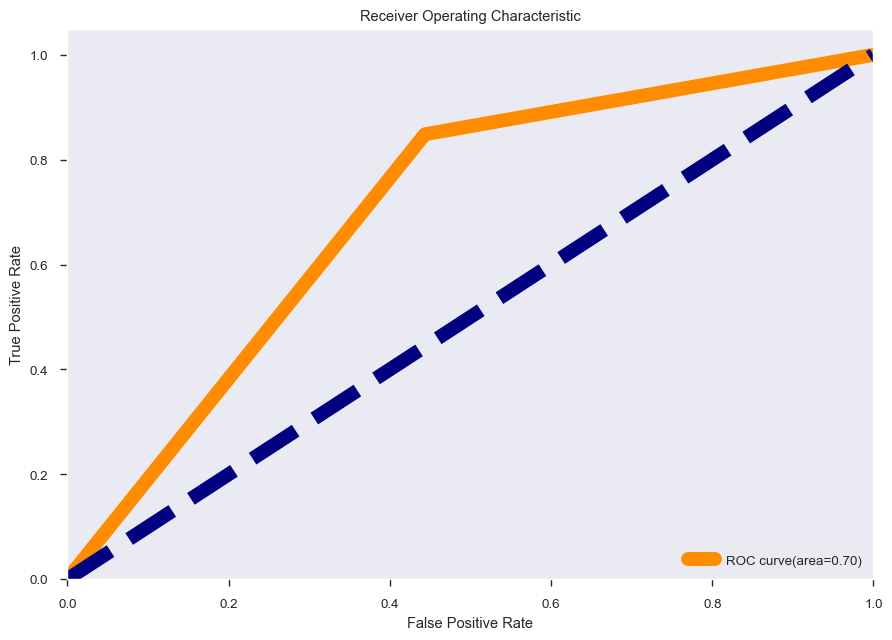

In [191]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_lgbm,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 73%

# CAT BOOST CLASSIFIER

In [192]:
!pip install catboost

In [193]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train_res, y_train_res.ravel())
pred_test_cat = cat.predict(new_xtest)
pred_train_cat = cat.predict(x_train_res)
cat_score = cat.score(new_xtest,y_test)
print('score of model is : ',cat_score*100)



Learning rate set to 0.024266
0:	learn: 0.6791713	total: 148ms	remaining: 2m 27s
1:	learn: 0.6655227	total: 152ms	remaining: 1m 16s
2:	learn: 0.6533128	total: 156ms	remaining: 51.7s
3:	learn: 0.6426515	total: 159ms	remaining: 39.6s
4:	learn: 0.6327780	total: 162ms	remaining: 32.3s
5:	learn: 0.6218685	total: 165ms	remaining: 27.4s
6:	learn: 0.6100681	total: 169ms	remaining: 23.9s
7:	learn: 0.6007379	total: 173ms	remaining: 21.4s
8:	learn: 0.5927988	total: 177ms	remaining: 19.4s
9:	learn: 0.5839387	total: 181ms	remaining: 17.9s
10:	learn: 0.5761194	total: 183ms	remaining: 16.5s
11:	learn: 0.5686623	total: 187ms	remaining: 15.4s
12:	learn: 0.5617054	total: 190ms	remaining: 14.4s
13:	learn: 0.5557969	total: 193ms	remaining: 13.6s
14:	learn: 0.5491280	total: 196ms	remaining: 12.9s
15:	learn: 0.5430929	total: 199ms	remaining: 12.2s
16:	learn: 0.5373331	total: 203ms	remaining: 11.7s
17:	learn: 0.5331664	total: 205ms	remaining: 11.2s
18:	learn: 0.5286550	total: 208ms	remaining: 10.8s
19:	learn

In [194]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_cat)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_cat)*100)


Accuracy Score of Training Data is: 90.68047337278107
Accuracy Score of Testing Data is: 78.3974862529458


## parameter tuning

In [195]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,50],'depth': [4,5,6],'learning_rate' : [0.01,0.02]}
cat = CatBoostClassifier()
clf=GridSearchCV(cat,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

0:	learn: 0.6894214	total: 7.77ms	remaining: 770ms
1:	learn: 0.6862582	total: 9.95ms	remaining: 487ms
2:	learn: 0.6826969	total: 12.6ms	remaining: 407ms
3:	learn: 0.6796851	total: 13.7ms	remaining: 329ms
4:	learn: 0.6760855	total: 14.8ms	remaining: 280ms
5:	learn: 0.6727683	total: 15.8ms	remaining: 248ms
6:	learn: 0.6699876	total: 16.9ms	remaining: 224ms
7:	learn: 0.6668877	total: 18ms	remaining: 207ms
8:	learn: 0.6640789	total: 19ms	remaining: 192ms
9:	learn: 0.6611672	total: 20.1ms	remaining: 181ms
10:	learn: 0.6581384	total: 21.2ms	remaining: 171ms
11:	learn: 0.6552698	total: 22.3ms	remaining: 164ms
12:	learn: 0.6524303	total: 23.6ms	remaining: 158ms
13:	learn: 0.6495357	total: 24.9ms	remaining: 153ms
14:	learn: 0.6469939	total: 26ms	remaining: 147ms
15:	learn: 0.6440719	total: 27.1ms	remaining: 142ms
16:	learn: 0.6412716	total: 28.1ms	remaining: 137ms
17:	learn: 0.6385851	total: 29.4ms	remaining: 134ms
18:	learn: 0.6361589	total: 30.6ms	remaining: 130ms
19:	learn: 0.6336477	total: 

In [196]:
cat=CatBoostClassifier(depth= 6, learning_rate= 0.02, n_estimators= 100)
cat.fit(x_train_res,y_train_res.ravel())
pred_test_cat=cat.predict(new_xtest)
pred_train_cat=cat.predict(x_train_res)
cat_score = cat.score(x_train_res,y_train_res)
cat_acc_score=accuracy_score(y_test,pred_test_cat)
print("Accuracy score is:",cat_acc_score*100)
print("score of model is:",cat_score*100)

0:	learn: 0.6857714	total: 16.9ms	remaining: 1.67s
1:	learn: 0.6792995	total: 19ms	remaining: 932ms
2:	learn: 0.6726284	total: 20.9ms	remaining: 675ms
3:	learn: 0.6658116	total: 22.5ms	remaining: 540ms
4:	learn: 0.6591608	total: 24.3ms	remaining: 462ms
5:	learn: 0.6528945	total: 26.1ms	remaining: 409ms
6:	learn: 0.6477872	total: 27.7ms	remaining: 369ms
7:	learn: 0.6425019	total: 29.6ms	remaining: 340ms
8:	learn: 0.6369417	total: 31.2ms	remaining: 316ms
9:	learn: 0.6314448	total: 32.9ms	remaining: 296ms
10:	learn: 0.6260353	total: 34.5ms	remaining: 279ms
11:	learn: 0.6210560	total: 36.2ms	remaining: 265ms
12:	learn: 0.6159454	total: 38.2ms	remaining: 256ms
13:	learn: 0.6117683	total: 39.9ms	remaining: 245ms
14:	learn: 0.6078796	total: 41.8ms	remaining: 237ms
15:	learn: 0.6031808	total: 43.7ms	remaining: 230ms
16:	learn: 0.5989159	total: 45.5ms	remaining: 222ms
17:	learn: 0.5951226	total: 47.4ms	remaining: 216ms
18:	learn: 0.5909923	total: 49.4ms	remaining: 211ms
19:	learn: 0.5877089	tot

In [197]:
print(confusion_matrix(y_test,pred_test_cat))

[[263  66]
 [232 712]]


In [198]:
print(classification_report(y_test,pred_test_cat))

              precision    recall  f1-score   support

           0       0.53      0.80      0.64       329
           1       0.92      0.75      0.83       944

    accuracy                           0.77      1273
   macro avg       0.72      0.78      0.73      1273
weighted avg       0.82      0.77      0.78      1273



## AUC-ROC CURVE:

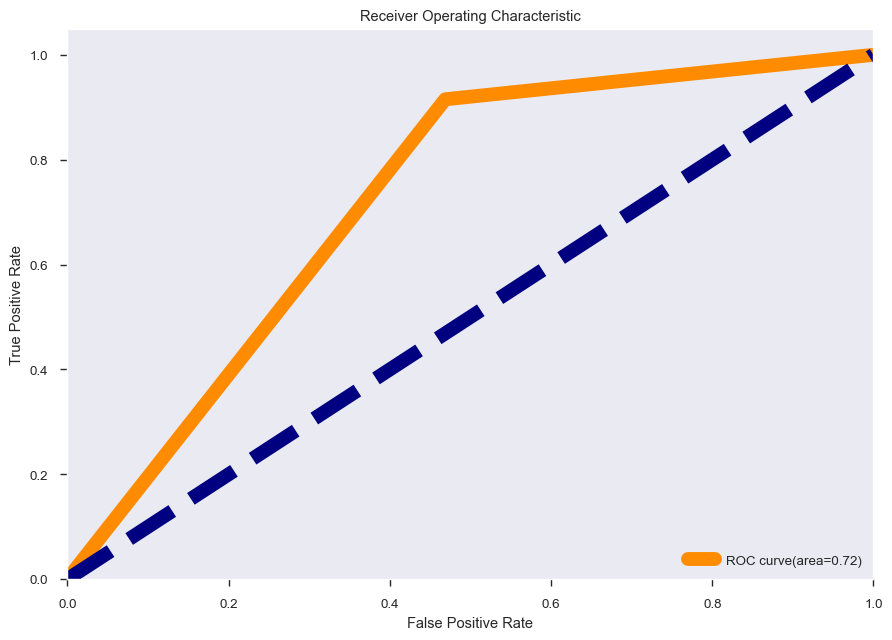

In [199]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_cat,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

 area under the curve is 72%

# EXTRA TREE CLASSIFIER

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_res, y_train_res.ravel())
pred_test_etc = etc.predict(new_xtest)
pred_train_etc = etc.predict(x_train_res)
etc_score = etc.score(new_xtest,y_test)
print('score of model is : ',etc_score*100)

score of model is :  78.00471327572663


In [201]:
print("Accuracy Score of Training Data is:",accuracy_score(y_train_res.ravel(),pred_train_etc)*100)
print("Accuracy Score of Testing Data is:",accuracy_score(y_test,pred_test_etc)*100)

Accuracy Score of Training Data is: 100.0
Accuracy Score of Testing Data is: 78.00471327572663


## parameter tuning

In [202]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],'n_estimators':[50,100],'max_features':['auto', 'sqrt', 'log2'],'random_state':list(range(0,1)),'min_weight_fraction_leaf':[0.1,0.2],'max_depth':[2,4]}
etc = ExtraTreesClassifier()
clf=GridSearchCV(etc,parameters)
clf.fit(x_train_res,y_train_res.ravel())
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_weight_fraction_leaf': 0.1, 'n_estimators': 50, 'random_state': 0}


In [203]:
etc = ExtraTreesClassifier(criterion= 'gini', max_depth= 4, max_features='auto', min_weight_fraction_leaf= 0.1, n_estimators= 50, random_state= 0)
etc.fit(x_train_res,y_train_res.ravel())
pred_test_etc=etc.predict(new_xtest)
pred_train_etc=etc.predict(x_train_res)
etc_score = etc.score(x_train_res,y_train_res)
etc_acc_score=accuracy_score(y_test,pred_test_etc)
print("Accuracy score is:",etc_acc_score*100)
print("score of model is:",etc_score*100)

Accuracy score is: 73.29143754909663
score of model is: 76.57342657342657


In [204]:
print(confusion_matrix(y_test,pred_test_etc))

[[276  53]
 [287 657]]


In [205]:
print(classification_report(y_test,pred_test_etc))

              precision    recall  f1-score   support

           0       0.49      0.84      0.62       329
           1       0.93      0.70      0.79       944

    accuracy                           0.73      1273
   macro avg       0.71      0.77      0.71      1273
weighted avg       0.81      0.73      0.75      1273



## AUC-ROC CURVE:

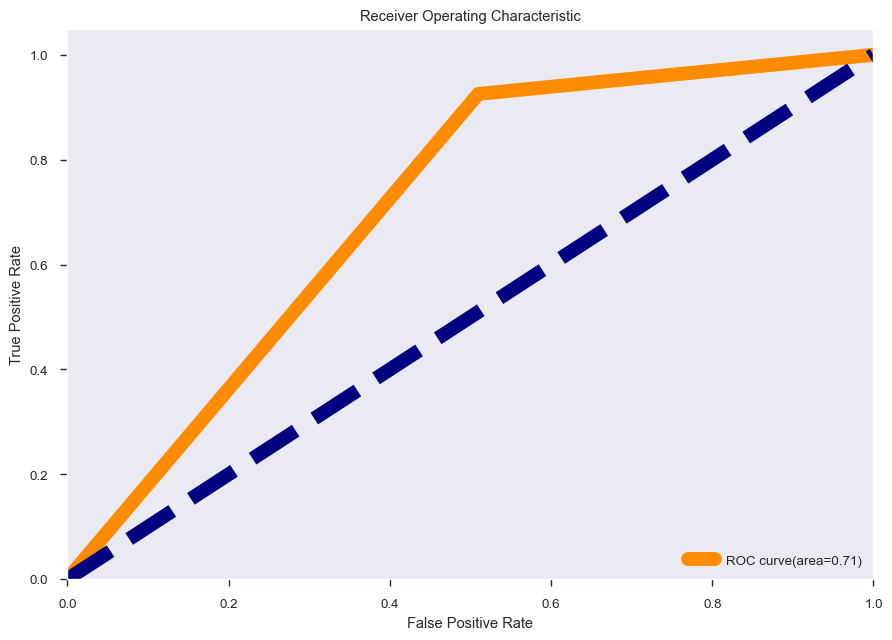

In [206]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_etc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 71%

# ADA BOOST CLASSIFIER

In [207]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=0,n_estimators=50,base_estimator=svc,algorithm='SAMME',learning_rate=0.05)
abc.fit(x_train_res, y_train_res.ravel())
pred_test_abc = abc.predict(new_xtest)
pred_train_abc = abc.predict(x_train_res)
abc_score = abc.score(new_xtest,y_test)
print('score of model is : ',abc_score*100)
abc_acc_score=accuracy_score(y_test,pred_test_abc)
print("Accuracy score is:",abc_acc_score*100)



score of model is :  72.42733699921445
Accuracy score is: 72.42733699921445


In [208]:
print(confusion_matrix(y_test,pred_test_abc))

[[259  70]
 [281 663]]


In [209]:
print(classification_report(y_test,pred_test_abc))

              precision    recall  f1-score   support

           0       0.48      0.79      0.60       329
           1       0.90      0.70      0.79       944

    accuracy                           0.72      1273
   macro avg       0.69      0.74      0.69      1273
weighted avg       0.79      0.72      0.74      1273



AUC-ROC CURVE:

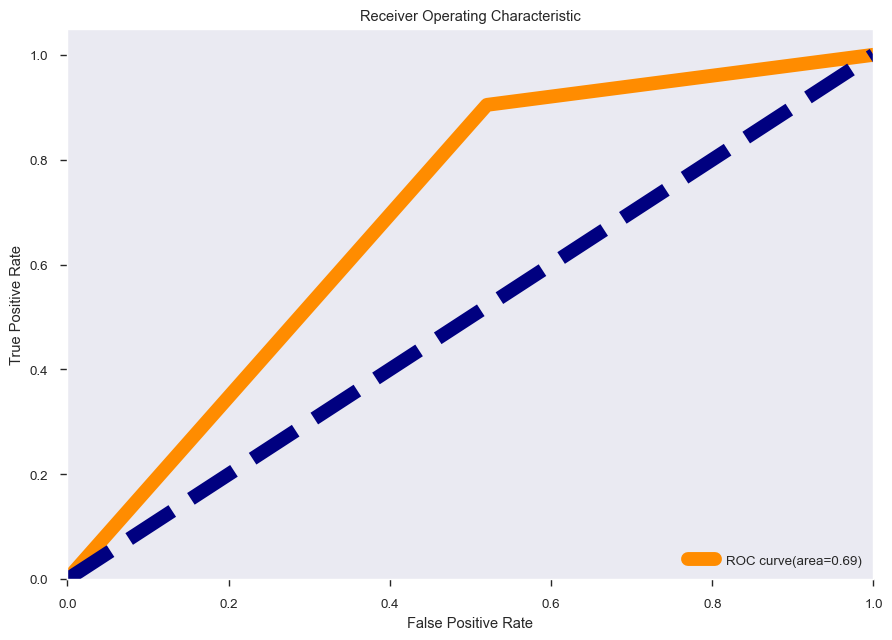

In [210]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_abc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 69%

# XGBOOST

In [211]:
!pip install xgboost

In [212]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train_res, y_train_res.ravel())
pred_test_xgb = xgb.predict(new_xtest)
pred_train_xgb = xgb.predict(x_train_res)
xgb_score = xgb.score(new_xtest,y_test)
print('score of model is : ',xgb_score*100)




[04:53:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  78.47604084838963


In [213]:
import xgboost as xgb
xgb = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=4,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)
xgb.fit(x_train_res, y_train_res.ravel())
pred_test_xgb = xgb.predict(new_xtest)
pred_train_xgb = xgb.predict(x_train_res)
xgb_score = xgb.score(new_xtest,y_test)
print('score of model is : ',xgb_score*100)




[04:53:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score of model is :  78.71170463472113


In [214]:
print(confusion_matrix(y_test,pred_test_xgb))

[[215 114]
 [157 787]]


In [215]:
print(classification_report(y_test,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61       329
           1       0.87      0.83      0.85       944

    accuracy                           0.79      1273
   macro avg       0.73      0.74      0.73      1273
weighted avg       0.80      0.79      0.79      1273



AUC-ROC CURVE:

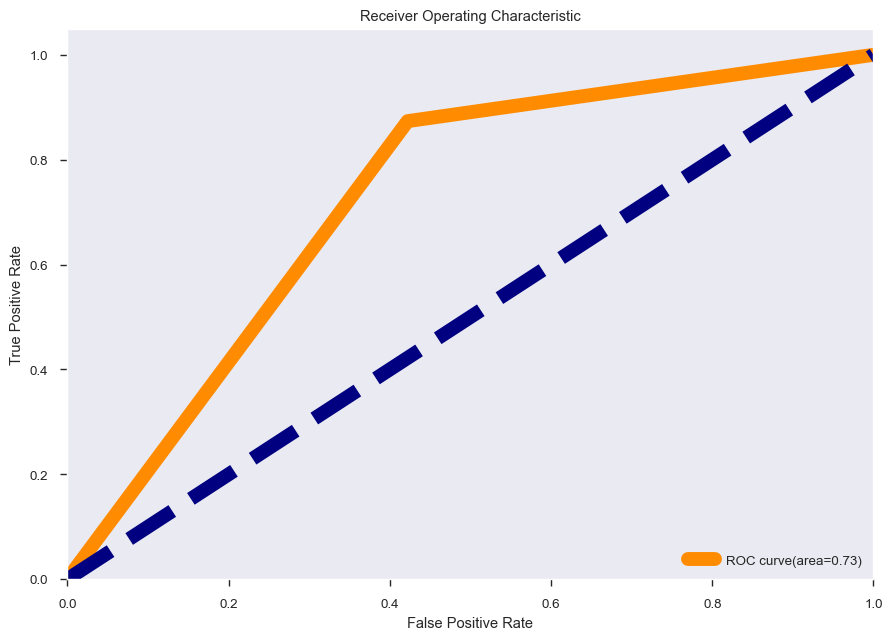

In [216]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test_xgb,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 72%


# VOTING CLASSIFIER

In [217]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('knn',KNeighborsClassifier()))
estimator.append(('svc',SVC(gamma='auto',probability=True)))
estimator.append(('dtc',DecisionTreeClassifier()))
estimator

[('knn', KNeighborsClassifier()),
 ('svc', SVC(gamma='auto', probability=True)),
 ('dtc', DecisionTreeClassifier())]

# HARD VOTING CLASSIFIER

In [218]:
vot_hard=VotingClassifier(estimators=estimator,voting='hard',flatten_transform='True',verbose='True',n_jobs=1)
vot_hard.fit(x_train_res,y_train_res.ravel())
y_pred_vot_h=vot_hard.predict(new_xtest)
print(y_pred_vot_h)
vot_h_score=accuracy_score(y_test,y_pred_vot_h)
print("Hard Voting Score %d" %vot_h_score)

[Voting] ...................... (1 of 3) Processing knn, total=   0.0s
[Voting] ...................... (2 of 3) Processing svc, total=   6.9s
[Voting] ...................... (3 of 3) Processing dtc, total=   0.0s
[1 0 0 ... 1 1 0]
Hard Voting Score 0


# SOFT VOTING CLASSIFIER

In [219]:
vot_hard=VotingClassifier(estimators=estimator,voting='soft',flatten_transform='True',verbose='True',n_jobs=-1)
vot_hard.fit(x_train_res,y_train_res.ravel())
y_pred_vot_s=vot_hard.predict(new_xtest)
print(y_pred_vot_s)
vot_s_score=accuracy_score(y_test,y_pred_vot_s)
print("Soft Voting Score %d" %vot_s_score)

[1 0 0 ... 1 1 0]
Soft Voting Score 0


## AUC-ROC CURVE:for Hard voting clasifier

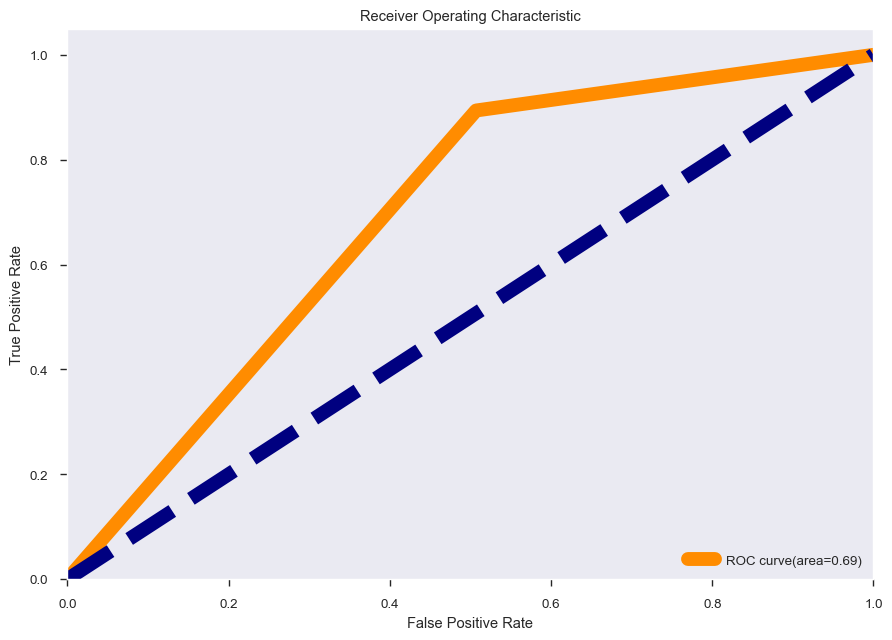

In [220]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_h,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 69%

## AUC-ROC CURVE:for soft voting clasifier

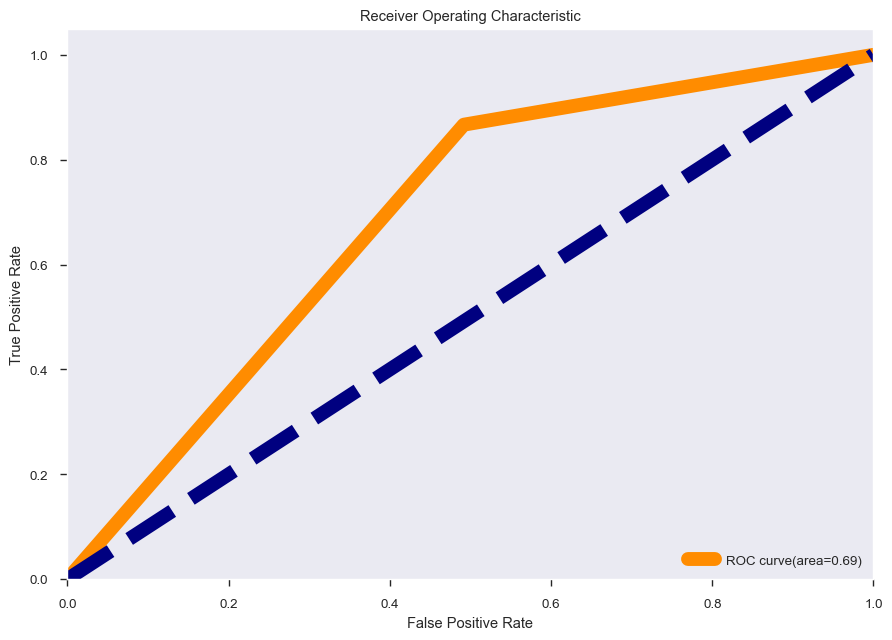

In [221]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred_vot_s,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)" %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic")
plt.legend(loc='lower right')
plt.show()

area under the curve is 69%

# CONCLUSION


# OUTPUT

In [227]:
import numpy as np
a=np.array(y_test)
predicted=np.array(xgb.predict(new_xtest))
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con


Original  Predicted
0            1          1
1            0          0
2            1          1
3            1          1
4            0          0
...        ...        ...
1268         1          0
1269         0          0
1270         1          1
1271         0          1
1272         0          1

[1273 rows x 2 columns]

Text(0.5, 1.0, 'Predicted')

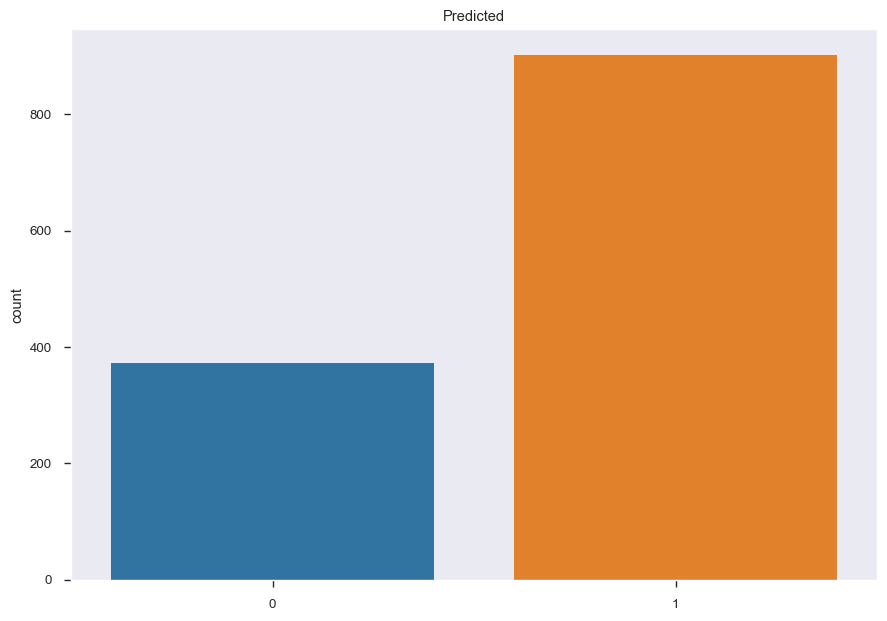

In [228]:
sns.countplot(x=predicted, data=df_con)
plt.title("Predicted")

Text(0.5, 1.0, 'Original')

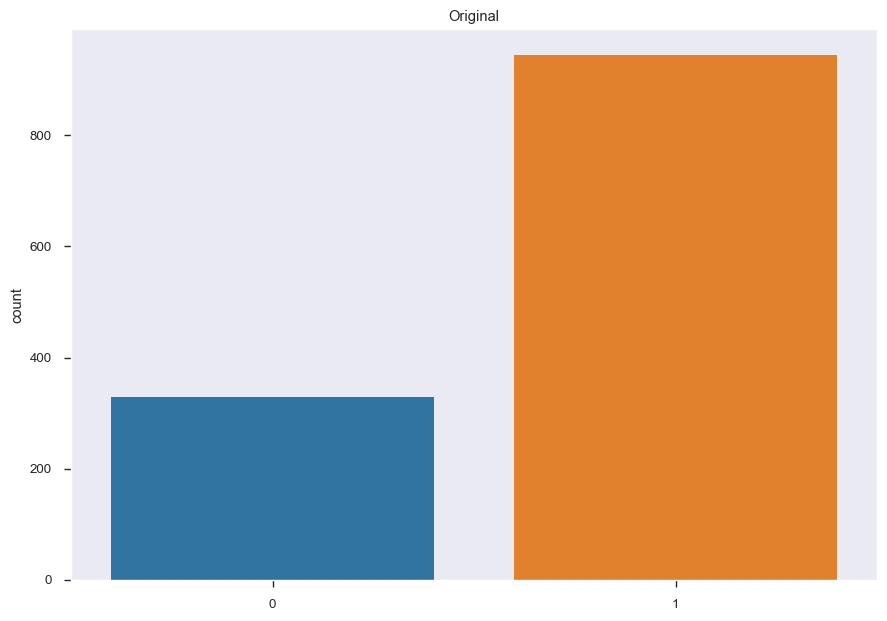

In [229]:
ax = sns.countplot(x=a, data=df)
plt.title("Original")

SAVE MODEL

In [230]:
import pickle
filename='Customer_Churn_Analysis_xgb.pkl'
pickle.dump(cat,open(filename,'wb'))


In [222]:
models=['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC','Gradient Boosting Classifier','Light Gradient Boosting Classifier','CatBoostClassifier',
'ExtraTreesClassifier','AdaBoost','XGBoost','Voting classifier','Soft Voting Classifier']
        

In [224]:
scores=[(accuracy_score(y_test,pred_test_lr)*100),accuracy_score(y_test,pred_test_rf)*100,accuracy_score(y_test,pred_test_dtc)*100,
       accuracy_score(y_test,pred_test_knn)*100,accuracy_score(y_test,pred_test_gnb)*100,accuracy_score(y_test,pred_test_svc)*100,
       accuracy_score(y_test,pred_test_gb)*100,accuracy_score(y_test,pred_test_lgbm)*100,accuracy_score(y_test,pred_test_cat)*100,
       accuracy_score(y_test,pred_test_etc)*100,accuracy_score(y_test,pred_test_abc)*100,accuracy_score(y_test,pred_test_xgb)*100,accuracy_score(y_test,y_pred_vot_h)*100,
       accuracy_score(y_test,y_pred_vot_s)*100]
scores

[73.4485467399843,
 73.29143754909663,
 72.74155538098978,
 69.44226237234878,
 72.42733699921445,
 75.72663000785546,
 78.3974862529458,
 77.14061272584446,
 76.59073055773763,
 73.29143754909663,
 72.42733699921445,
 78.71170463472113,
 73.60565593087196,
 74.70542026708561]

In [225]:
Nos=[]
for i in range(1,len(models)+1):
    Nos.append(i)
Nos    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [226]:
import pandas as pd
Model_scores=pd.DataFrame({})
Model_scores['Nos']=Nos
Model_scores['Model Names']=models
Model_scores['Scores']=scores
Model_scores.sort_values(by='Scores', ascending=False).style.hide_index()

## Best Model

From the above models XGBoostClassifier performs well.
Because,It is Highly Flexible
It uses the power of parallel processing
It is faster than Gradient Boosting
It supports regularization
It is designed to handle missing data with its in-build features.
The user can run a cross-validation after each iteration.
It Works well in small to medium dataset
 
So we save this model for prediction

## Key Insights

The churn customers are high because of contract,high charges they pay, bills,tenure and other factors.And also the factor the senior citizen will move out because of age.So we have to keep all factors in mind and draw plan accordingly

In [231]:
df_con.to_csv("Customer_Churn_Analysis_xgb.csv",sep='\t')